# ECE 232E Project 1: Random Graphs and Random Walks


# 1. Generating Random Networks

In [ ]:
# install packages
install.packages("igraph")

# load libraries
library("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




## 1. Create random networks using Erdös-Rényi (ER) model

<div class="alert alert-block alert-success">
<b>Question 1 (a):</b> Create undirected random networks with n = 900 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.002, 0.006, 0.012, 0.045, and 0.1. Plot the degree distributions. What distribution (linear/exponential/gaussian/binomial or something else) is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values.
</div>

[1] "p = 0.002:"
[1] "- Theoretical : Mean =  1.800000, Variance =  1.796400"
[1] "- Experimental: Mean =  1.860000, Variance =  1.800178"
[1] "p = 0.006:"
[1] "- Theoretical : Mean =  5.400000, Variance =  5.367600"
[1] "- Experimental: Mean =  5.542222, Variance =  5.454278"
[1] "p = 0.012:"
[1] "- Theoretical : Mean = 10.800000, Variance = 10.670400"
[1] "- Experimental: Mean = 10.764444, Variance = 10.609635"
[1] "p = 0.045:"
[1] "- Theoretical : Mean = 40.500000, Variance = 38.677500"
[1] "- Experimental: Mean = 40.826667, Variance = 39.246897"
[1] "p = 0.100:"
[1] "- Theoretical : Mean = 90.000000, Variance = 81.000000"
[1] "- Experimental: Mean = 90.437778, Variance = 83.719150"


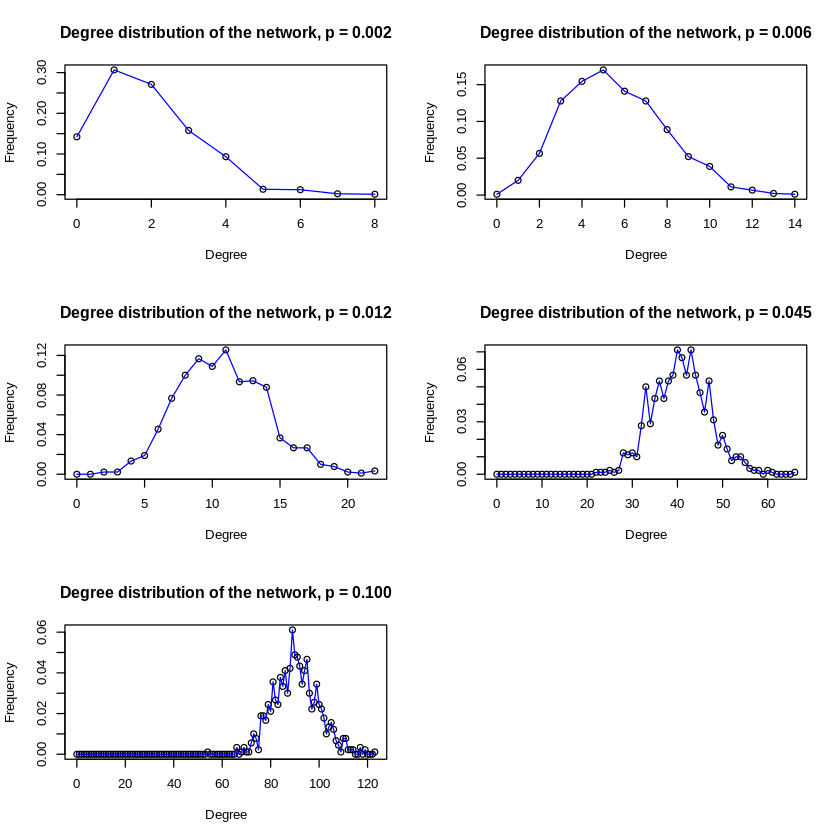

In [ ]:
# init
ps <- c(0.002, 0.006, 0.012, 0.045, 0.1)
n <- 900
par(mfrow=c(3, 2))

for (p in ps) {
  # create the graph
  g <- erdos.renyi.game(n, p=p, directed=F)

  # plot
  plot(seq_along(degree.distribution(g)) - 1, degree.distribution(g), 
       main=sprintf("Degree distribution of the network, p = %.3f", p), 
       xlab="Degree", ylab="Frequency")
  lines(seq_along(degree.distribution(g)) - 1, degree.distribution(g), col='blue')

  # Mean, Variance
  print(sprintf("p = %.3f:", p))
  print(sprintf("- Theoretical : Mean = %9.6f, Variance = %9.6f", n*p, n*p*(1-p)))
  print(sprintf("- Experimental: Mean = %9.6f, Variance = %9.6f", 
                mean(degree(g)), var(degree(g))))
}

<div class="alert alert-block alert-success">
<b>Answer 1 (a):</b> The plots of degree distribution as well as the means and variances for each probability are reported above. For small p, a Poisson distribution can be observed and for large p, a Binomial distribution can be observed.
</div>

<div class="alert alert-block alert-success">
<b>Question 1 (b):</b> For each p and n = 900, answer the following questions:

Are all random realizations of the ER network connected? Numerically estimate the probability that a generated network is connected. For one instance of the networks with that p, find the giant connected component (GCC) if not connected. What is the diameter of the GCC?
</div>

In [ ]:
# init
ps <- c(0.002, 0.006, 0.012, 0.045, 0.1)
n <- 900
est_time <- 100

# check each p
for (p in ps) {
  # init
  count <- 0
  gcc_diameter <- NULL
  gcc_node <- NULL
  gcc_edge <- NULL
  
  # run numeric estimation
  for (i in 1:est_time) {
    g <- erdos.renyi.game(n, p, directed=F)
    if (is.connected(g)){
      count <- count + 1
    }
    else if (!is.connected(g)){
      g_components <- clusters(g)
      # which is the largest component
      ix <- which.max(g_components$csize)
      # get the subgraph correspondent to just the giant component
      gcc <- induced.subgraph(g, which(g_components$membership == ix))
      gcc_diameter <- diameter(gcc, directed=F)
      gcc_node <- vcount(gcc)
      gcc_edge <- ecount(gcc)
    }
  }
  
  # print report
  print(sprintf("Numerical probability of connected network for p = %.3f: %f", 
                p, count/est_time))
  
  if (is.null(gcc_diameter)) {
    print("- Diameter of GCC: no non-connected network")
  } else {
    print(sprintf("- Diameter of GCC: %d", gcc_diameter))
  }

  if (is.null(gcc_node)) {
    print("- Number of nodes of GCC: no non-connected network")
  } else {
    print(sprintf("- Number of nodes of GCC: %d", gcc_node))
  }

  if (is.null(gcc_edge)) {
    print("- Number of edges of GCC: no non-connected network")
  } else {
    print(sprintf("- Number of edges of GCC: %d", gcc_edge))
  }

  print(strrep("=", 70))
}
    

[1] "Numerical probability of connected network for p = 0.002: 0.000000"
[1] "- Diameter of GCC: 24"
[1] "- Number of nodes of GCC: 661"
[1] "- Number of edges of GCC: 773"
[1] "======================================================================"
[1] "Numerical probability of connected network for p = 0.006: 0.020000"
[1] "- Diameter of GCC: 9"
[1] "- Number of nodes of GCC: 897"
[1] "- Number of edges of GCC: 2469"
[1] "======================================================================"
[1] "Numerical probability of connected network for p = 0.012: 0.990000"
[1] "- Diameter of GCC: 5"
[1] "- Number of nodes of GCC: 899"
[1] "- Number of edges of GCC: 4783"
[1] "======================================================================"
[1] "Numerical probability of connected network for p = 0.045: 1.000000"
[1] "- Diameter of GCC: no non-connected network"
[1] "- Number of nodes of GCC: no non-connected network"
[1] "- Number of edges of GCC: no non-connected network"
[1] "========

<div class="alert alert-block alert-success">
<b>Answer 1 (b):</b> Not all random realizations of the ER network are connected. The report is shown above.
</div>

<div class="alert alert-block alert-success">
<b>Question 1 (c):</b> It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of the total network size) is a highly nonlinear function of p, with interesting properties occurring for values where $p = O(\frac{1}{n})$ and $p = O(\frac{\ln{n}}{n})$.

For n = 900, sweep over values of $p$ from 0 to a $p_{max}$ that makes the network almost surely connected and create 100 random networks for each $p$. $p_{max}$ should be roughly determined by yourself. Then scatter plot the normalized GCC sizes vs $p$. Plot a line of the average normalized GCC sizes for each $p$ along with the scatter plot.

<ul>  
  <li><b>i. </b> Empirically estimate the value of p where a giant connected component starts to emerge (define your criterion of “emergence”)? Do they match with theoretical values mentioned or derived in lectures?</li>
  <li><b>ii. </b> Empirically estimate the value of p where the giant connected component takes up over 99% of the nodes in almost every experiment.</li>
</ul>
</div>

[1] "p at which GCC starts to emerge: 0.001200"
[1] "p at which 99 percent nodes belong to GCC: 0.010100"


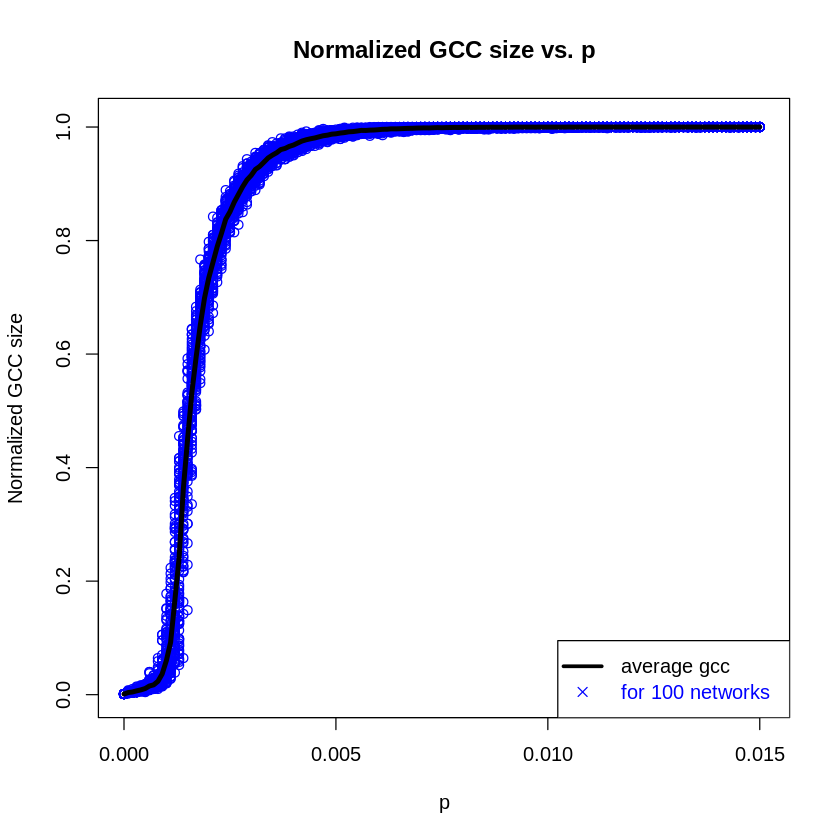

In [ ]:
# '''
# According to 1(b), we know that for p = 0.012, the numerical probability of 
# connected network is around 99%. Therefore, I assume that p_max = 0.015.
# '''

# init
p_max <- 0.015
ps <- seq(0, p_max, 0.0001)
n <- 900
est_time <- 100
norm_gcc_sizes <- matrix(data=0.0, nrow=length(ps), ncol=est_time)

# calculate each gcc size for p and samples
for (i in seq_along(ps)) {
  # run numeric estimation
  for (j in 1:est_time) {
    g <- erdos.renyi.game(n, ps[i], directed=F)
    g_components <- clusters(g)
    norm_gcc_sizes[i, j] <- max(g_components$csize) / n
  }
}

# average size of each p
average_gcc_sizes <- rowMeans(norm_gcc_sizes)

# plot result of samples
plot(rep(ps[1], 100), norm_gcc_sizes[1, 1:est_time],
     xlab="p", ylab="Normalized GCC size", main="Normalized GCC size vs. p",
     col='blue', xlim=c(0, p_max + 0.0001), ylim=c(0, 1.01))
for (i in seq_along(ps[2:length(ps)]) + 1) {
    points(rep(ps[i], 100), norm_gcc_sizes[i, 1:est_time], col='blue')
}
# plot result of average size
lines(ps, average_gcc_sizes, lwd=4)
legend('bottomright', legend=c("average gcc", "for 100 networks"),
       pch=c(NA, 4), lty=c(1, NA), lwd=c(3,NA),
       col=c(1,'blue'), text.col=c(1,'blue'))

# print out report
gcc_thr <- 0.1
print(sprintf("p at which GCC starts to emerge: %f",
              ps[min(which(average_gcc_sizes > gcc_thr))]))
print(sprintf("p at which 99 percent nodes belong to GCC: %f",
              ps[mean(which(average_gcc_sizes > 0.99))]))

<div class="alert alert-block alert-success">
<b>Answer 1 (c):</b> The result of the scatter plot of the normalized GCC sizes vs $p$ and the line of the average normalized GCC sizes is shown above.

<ul>  
  <li><b>i. </b> Based on the first intuition of the plot result, I define normalized GCC size equal to 0.1 as the criterion of emergence. As a result, the corresponding experimental probability a GCC starts to emerge is $p_{exp} = 0.0012$, which is very close to the theoretical values $p_{th} = O(\frac{1}{n}) = 0.0011$.</li>
  <li><b>ii. </b> The value of p where the GCC takes up over 99% of the nodes in almost every experiment is 0.0101.</li>
</ul>

</div>

<div class="alert alert-block alert-success">
<b>Question 1 (d):</b> 
<ul>  
  <li><b>i. </b> Define the average degree of nodes $c = n × p = 0.5$. Sweep over the number of nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities $p = c/n$, as a function of n. What trend is observed?</li>
  <li><b>ii. </b> Repeat the same for c = 1</li>
  <li><b>iii. </b> Repeat the same for values of c = 1.15, 1.25, 1.35, and show the results for these three values in a single plot.</li>
  <li><b>iv. </b> What is the relation between the expected GCC size and n in each case?</li>
</ul>
</div>

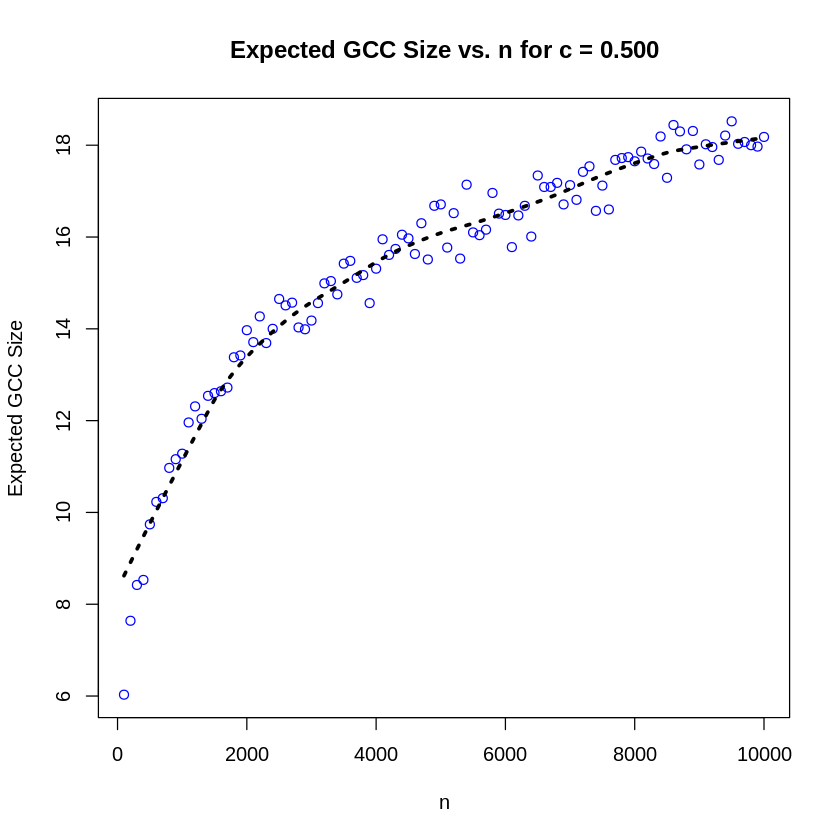

In [ ]:
# '''
# c = 0.5
# '''

# init
c = 0.5
ns <- seq(100, 10000, 100)
est_time <- 100
gcc_sizes <- matrix(data=0.0, nrow=length(ns), ncol=est_time)

# test each c
for (i in seq_along(ns)) {
  for (j in 1:est_time) {
    n <- ns[i]
    p <- c/n
    g <- erdos.renyi.game(n, p, directed=F)
    g_components <- clusters(g)
    gcc_sizes[i, j] <- max(g_components$csize)
  }
}

# average size of each n
average_gcc_sizes <- rowMeans(gcc_sizes)

# plot
plot(ns, average_gcc_sizes, xlab="n", ylab="Expected GCC Size", col='blue',
     main=sprintf("Expected GCC Size vs. n for c = %.3f", c))
lines(lowess(ns, average_gcc_sizes, f=0.3), lwd=3, lty=3, col="black")

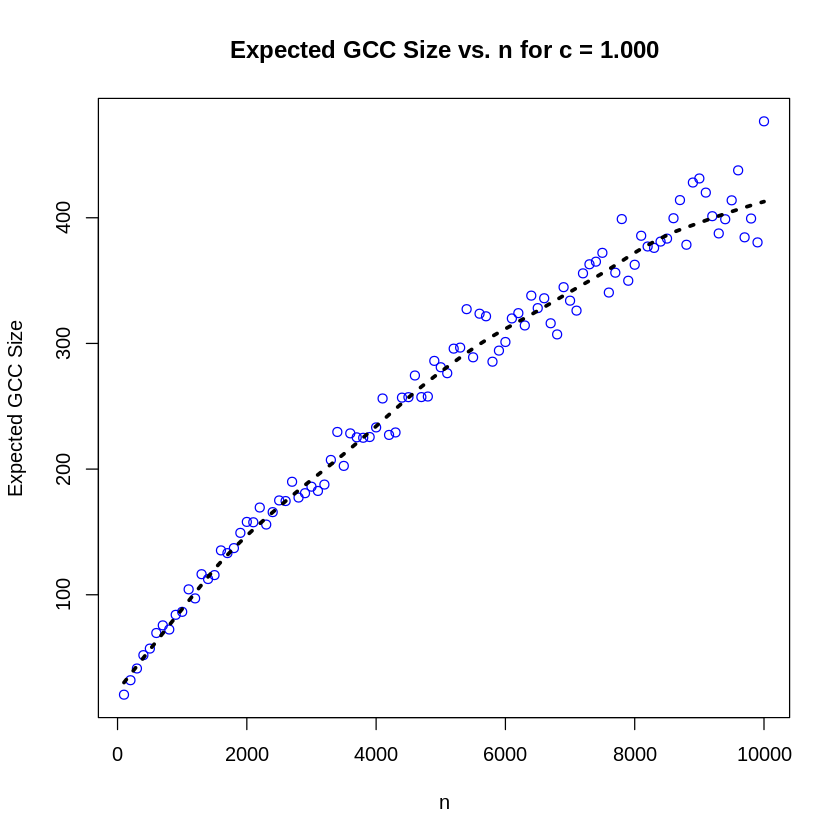

In [ ]:
# '''
# c = 1
# '''

# init
c = 1
ns <- seq(100, 10000, 100)
est_time <- 100
gcc_sizes <- matrix(data=0.0, nrow=length(ns), ncol=est_time)

# test each c
for (i in seq_along(ns)) {
  for (j in 1:est_time) {
    n <- ns[i]
    p <- c/n
    g <- erdos.renyi.game(n, p, directed=F)
    g_components <- clusters(g)
    gcc_sizes[i, j] <- max(g_components$csize)
  }
}

# average size of each n
average_gcc_sizes <- rowMeans(gcc_sizes)

# plot
plot(ns, average_gcc_sizes, xlab="n", ylab="Expected GCC Size", col='blue',
     main=sprintf("Expected GCC Size vs. n for c = %.3f", c))
lines(lowess(ns, average_gcc_sizes, f=0.3), lwd=3, lty=3, col="black")

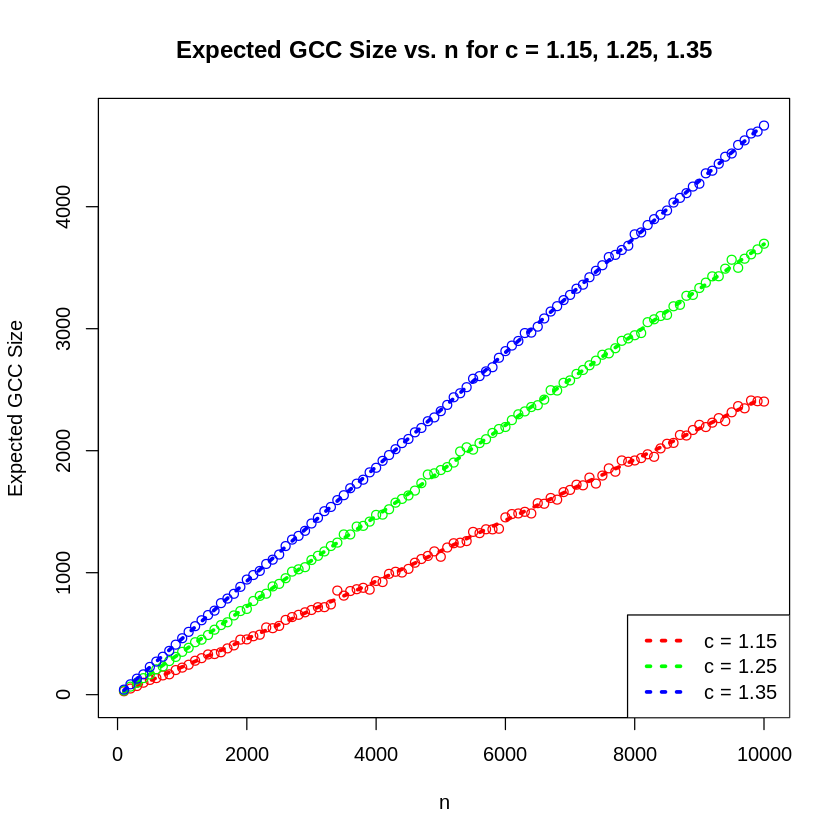

In [ ]:
# global variables
ns <- seq(100, 10000, 100)
est_time <- 100

#############################################################################
# '''
# c = 1.15
# '''

# init
c = 1.15
gcc_sizes <- matrix(data=0.0, nrow=length(ns), ncol=est_time)

# test each c
for (i in seq_along(ns)) {
  for (j in 1:est_time) {
    n <- ns[i]
    p <- c/n
    g <- erdos.renyi.game(n, p, directed=F)
    g_components <- clusters(g)
    gcc_sizes[i, j] <- max(g_components$csize)
  }
}

# average size of each n
average_gcc_sizes <- rowMeans(gcc_sizes)

# plot
plot(ns, average_gcc_sizes, xlab="n", ylab="Expected GCC Size", col='red',
     main="Expected GCC Size vs. n for c = 1.15, 1.25, 1.35", ylim = c(0, 4700))
lines(lowess(ns, average_gcc_sizes, f=0.3), lwd=3, lty=3, col="red")
#############################################################################

#############################################################################
# '''
# c = 1.25
# '''

# init
c = 1.25
gcc_sizes <- matrix(data=0.0, nrow=length(ns), ncol=est_time)

# test each c
for (i in seq_along(ns)) {
  for (j in 1:est_time) {
    n <- ns[i]
    p <- c/n
    g <- erdos.renyi.game(n, p, directed=F)
    g_components <- clusters(g)
    gcc_sizes[i, j] <- max(g_components$csize)
  }
}

# average size of each n
average_gcc_sizes <- rowMeans(gcc_sizes)

# plot
points(ns, average_gcc_sizes, col='green')
lines(lowess(ns, average_gcc_sizes, f=0.3), lwd=3, lty=3, col="green")
#############################################################################

#############################################################################
# '''
# c = 1.35
# '''

# init
c = 1.35
gcc_sizes <- matrix(data=0.0, nrow=length(ns), ncol=est_time)

# test each c
for (i in seq_along(ns)) {
  for (j in 1:est_time) {
    n <- ns[i]
    p <- c/n
    g <- erdos.renyi.game(n, p, directed=F)
    g_components <- clusters(g)
    gcc_sizes[i, j] <- max(g_components$csize)
  }
}

# average size of each n
average_gcc_sizes <- rowMeans(gcc_sizes)

# plot
points(ns, average_gcc_sizes, col='blue')
lines(lowess(ns, average_gcc_sizes, f=0.3), lwd=3, lty=3, col="blue")
#############################################################################

legend('bottomright', legend=c("c = 1.15", "c = 1.25", "c = 1.35"),
       lty=c(3, 3, 3), lwd=c(3,3,3), col = c('red', 'green', 'blue'))

<div class="alert alert-block alert-success">
<b>Answer 1 (d):</b>
<ul>  
  <li><b>i. </b> The plot is shown above. A monotonically increasing trend which looks like a logarithmic curve can be observed, meaning that the higher the number of nodes is, the larger the expected GCC size is.</li>
  <li><b>ii. </b> The result is shown above.</li>
  <li><b>iii. </b> The result is also shown above.</li>
  <li><b>iv. </b> In each case, one can observe the relationship that he higher the number of nodes is, the larger the expected GCC size is.</li>
</ul>
</div>

## 2. Create networks using preferential attachment model

<div class="alert alert-block alert-success">
<b>Question 2 (a):</b> Create an undirected network with n = 1050 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?
</div>

[1] "Total generated connected graphs: 1000/1000"


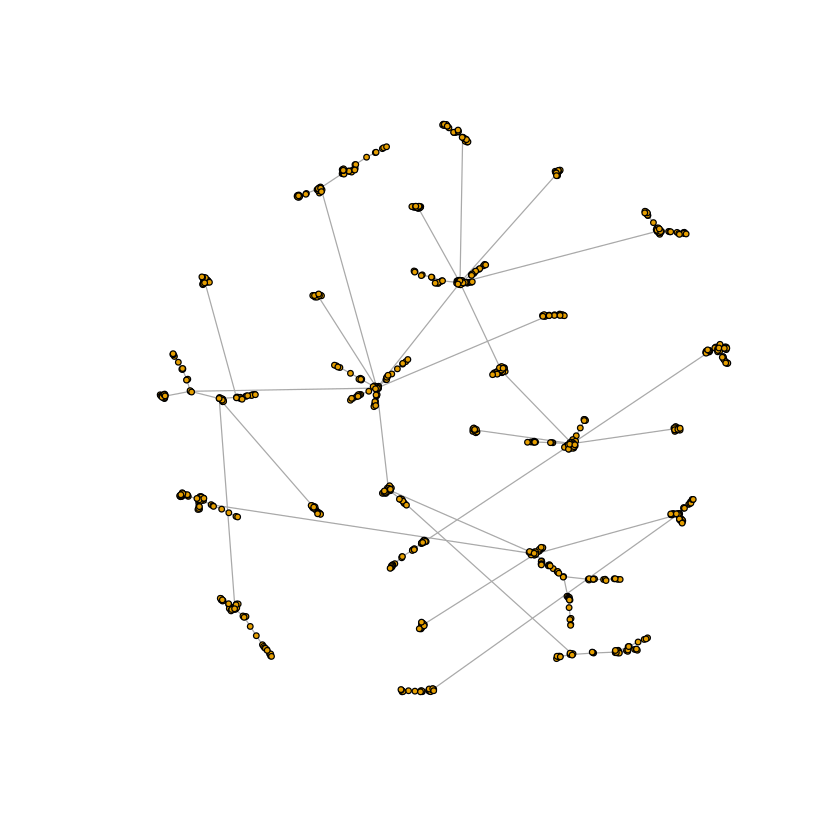

In [ ]:
# '''
# To test whether such network is always connected, 
# I randomly generate 1000 networks
# '''

count <- 0
for (i in 1:1000) {
  g <- barabasi.game(1050, m=1, directed=F)
  if (is.connected(g)) {
    count <- count + 1
  }
}

print(sprintf("Total generated connected graphs: %d/%d", count, 1000))
plot(g, vertex.size=2, vertex.label=NA)

<div class="alert alert-block alert-success">
<b>Answer 2 (a):</b> According to the result shown above, yes, such network is always connected.
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (b):</b> Use fast greedy method to find the community structure. Measure modularity. Define Assortativity. Compute Assortativity.
</div>



[1] "Modularity: 0.932588"
[1] "Degree Assortativity: -0.076827"


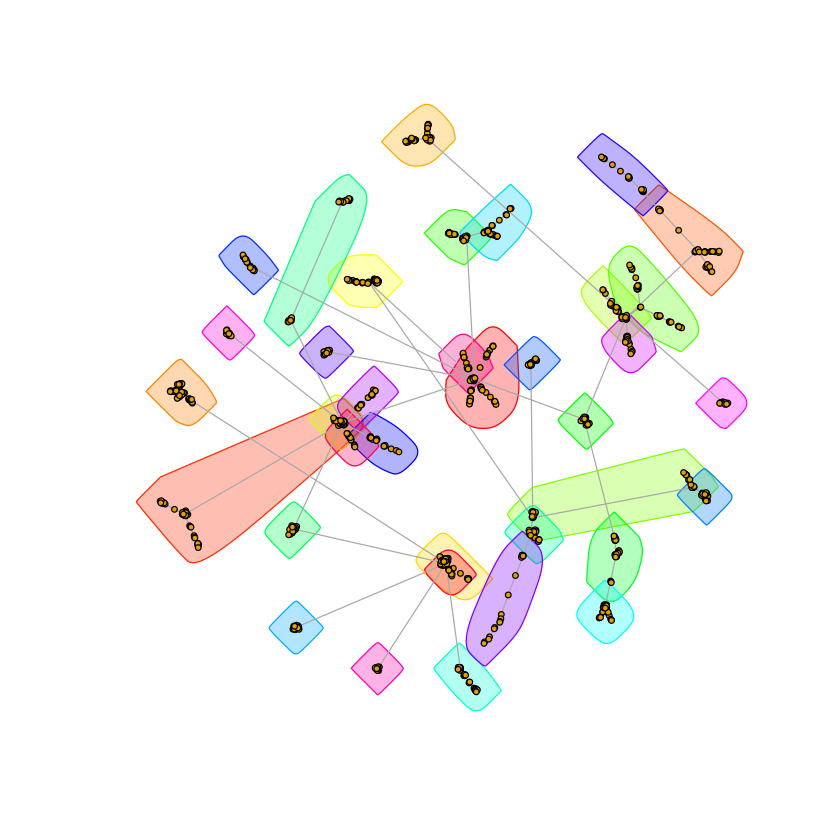

In [ ]:
# apply fast greedy method
comm_struct <- fastgreedy.community(g)

# measure modularity
mod <- modularity(comm_struct)
print(sprintf("Modularity: %f",mod))

# compute assortativity
assort <- assortativity_degree(g, directed=F)
print(sprintf("Degree Assortativity: %f", assort))

plot(g, mark.groups=groups(comm_struct), vertex.size=2, vertex.label=NA)

<div class="alert alert-block alert-success">
<b>Answer 2 (b):</b> Assortativity is described as the tendency of vertices to connect or ‘attach’ to vertices with similar properties in a graph. It is an effective measure of homophily in a network. Here the most commen numerical assortativity, degree assortativity, is computed. The modularity of the network is 0.9326 and the degree assortativity is -0.0768.
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (c):</b> Try to generate a larger network with 10500 nodes using the same model. Compute modularity and assortativity. How is it compared to the smaller network’s modularity?
</div>


[1] "Modularity of Larger Network: 0.979157"
[1] "Degree Assortativity of Larger Network: -0.058617"


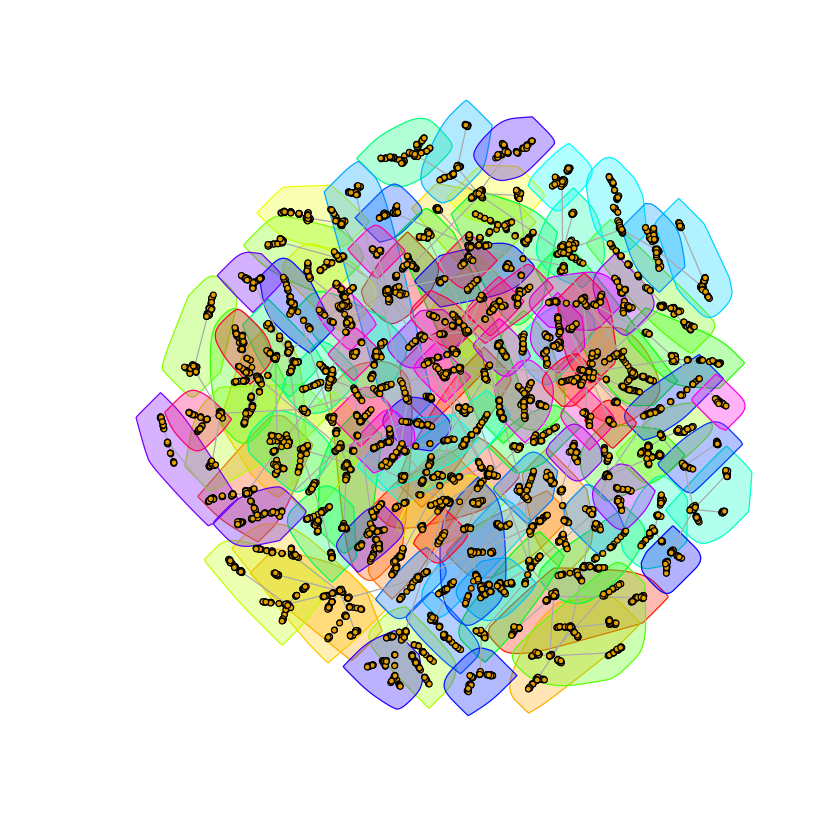

In [ ]:
# create network
g2 <- barabasi.game(10500, m=1, directed=F)

# apply fast greedy method
comm_struct2 <- fastgreedy.community(g2)

# measure modularity
mod2 <- modularity(comm_struct2)
print(sprintf("Modularity of Larger Network: %f",mod2))

# compute assortativity
assort2 <- assortativity_degree(g2, directed=F)
print(sprintf("Degree Assortativity of Larger Network: %f", assort2))

plot(g2, mark.groups=groups(comm_struct2), vertex.size=2, vertex.label=NA)

<div class="alert alert-block alert-success">
<b>Answer 2 (c):</b> The modularity of the larger network is 0.9792 and the degree assortativity is -0.0586. Compared with the smaller network’s modularity, the larger network has higher mudularity.
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (d):</b> Plot the degree distribution in a log-log scale for both n = 1050, 10500, then estimate the slope of the plot using linear regression.
</div>


[1] "Slope and intercept for n = 1050:"

Call:
lm(formula = dist_1 ~ deg_1)

Coefficients:
(Intercept)        deg_1  
     0.7302      -2.5622  

[1] "Slope and intercept for n = 10500:"

Call:
lm(formula = dist_2 ~ deg_2)

Coefficients:
(Intercept)        deg_2  
      1.314       -2.954  



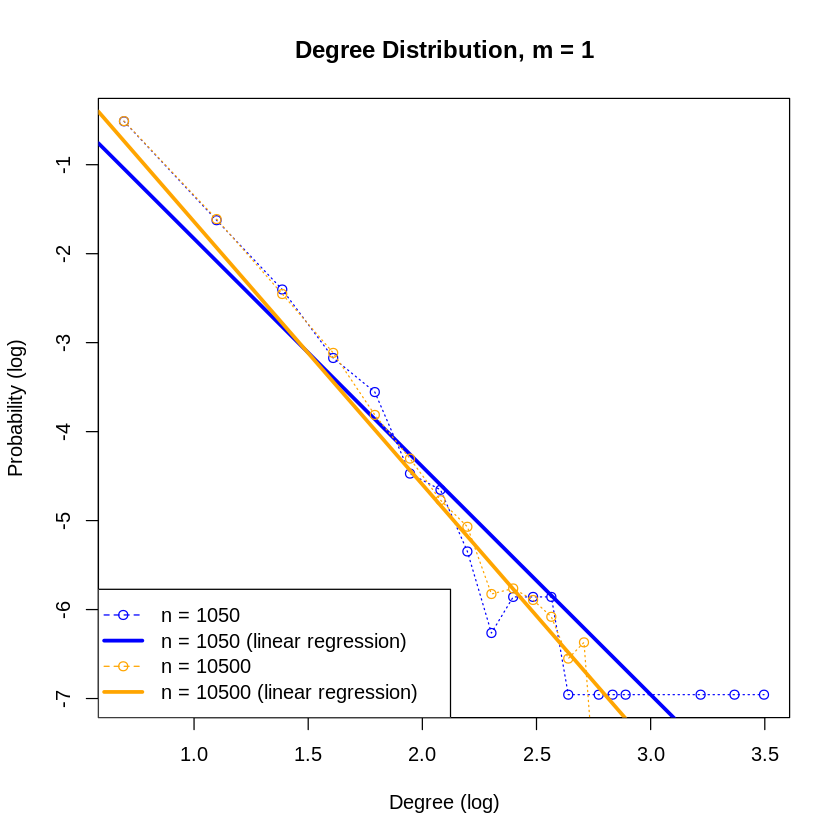

In [ ]:
# smaller network
degdist_1 <- degree.distribution(g)
idx_1 <- which(degdist_1 !=0, arr.ind=T)
deg_1 <- log(seq(1:length(degdist_1)))[idx_1]
dist_1 <- log(degdist_1)[idx_1]
plot(deg_1, dist_1, main="Degree Distribution, m = 1",
     xlab="Degree (log)", ylab="Probability (log)", col="blue")
lines(deg_1, dist_1, lty=3, col="blue")
# linear regression
lr_1 = lm(dist_1 ~ deg_1)
print("Slope and intercept for n = 1050:")
print(lr_1)
abline(lr_1, col="blue", lwd=3)


# larger network
degdist_2 <- degree.distribution(g2)
idx_2 <- which(degdist_2 !=0, arr.ind=T)
deg_2 <- log(seq(1:length(degdist_2)))[idx_2]
dist_2 <- log(degdist_2)[idx_2]
points(deg_2, dist_2, col="orange")
lines(deg_2, dist_2, lty=3, col="orange")
# linear regression
lr_2 = lm(dist_2 ~ deg_2)
print("Slope and intercept for n = 10500:")
print(lr_2)
abline(lr_2, col="orange", lwd=3)

# legend
legend('bottomleft', lty = c(2, 1, 2, 1), lwd = c(1, 3, 1, 3), pch=c(1, NA, 1, NA),
       legend=c("n = 1050", "n = 1050 (linear regression)",
                "n = 10500", "n = 10500 (linear regression)"),
       col=c('blue', 'blue', 'orange', 'orange'))

<div class="alert alert-block alert-success">
<b>Answer 2 (d):</b> The plot and report are shown above.
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (e):</b> In the two networks generated in 2(a) and 2(c), perform the following:

Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?
</div>


[1] "Slope and intercept for n = 1050:"

Call:
lm(formula = dist_n1 ~ deg_n1)

Coefficients:
(Intercept)       deg_n1  
     -1.376       -1.029  

[1] "Slope and intercept for n = 10500:"

Call:
lm(formula = dist_n2 ~ deg_n2)

Coefficients:
(Intercept)       deg_n2  
    -0.6955      -1.5129  



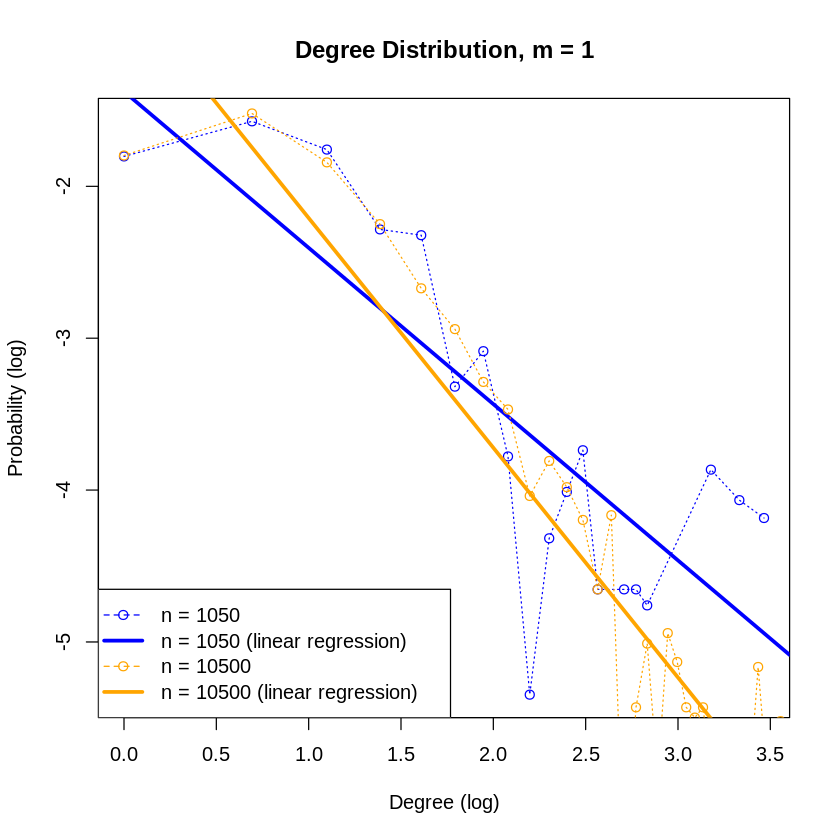

In [ ]:
# init
n1 = 1050
deg_n1 <- matrix(data=0.0, nrow=n1, ncol=1)

for (k in 1:n1){
  # randomly pick a node i
  n_i <- sample(n1, 1)
  # corresponding neighbors
  i_js <- neighbors(g, n_i)
  if(length(i_js) > 1){
    # randomly pick a neighbor j
    i_j <- sample(i_js, 1)
    deg_n1[k] = degree(g, i_j)
  } else {
    deg_n1[k] = degree(g, i_js)
  } 
}
# get the distribution
dist_n1 = table(deg_n1)
# convert to log scale
deg_n1 = log(as.numeric(names(dist_n1)))
dist_n1 = log(as.vector(dist_n1)/n1)

# make the plot
plot(deg_n1, dist_n1, main="Degree Distribution, m = 1",
     xlab="Degree (log)", ylab="Probability (log)", col="blue")
lines(deg_n1, dist_n1, lty=3, col="blue")
# linear regression
lr_1 = lm(dist_n1 ~ deg_n1)
print("Slope and intercept for n = 1050:")
print(lr_1)
abline(lr_1, col="blue", lwd=3)
#############################################################################

# init
n2 = 10500
deg_n2 <- matrix(data=0.0, nrow=n2, ncol=1)

for (k in 1:n2){
  # randomly pick a node i
  n_i <- sample(n2, 1)
  # corresponding neighbors
  i_js <- neighbors(g2, n_i)
  if(length(i_js) > 1){
    # randomly pick a neighbor j
    i_j <- sample(i_js, 1)
    deg_n2[k] = degree(g2, i_j)
  } else {
    deg_n2[k] = degree(g2, i_js) 
  }
}
# get the distribution
dist_n2 = table(deg_n2)
# convert to log scale
deg_n2 = log(as.numeric(names(dist_n2)))
dist_n2 = log(as.vector(dist_n2)/n2)

# make the plot
points(deg_n2, dist_n2, col="orange")
lines(deg_n2, dist_n2, lty=3, col="orange")
# linear regression
lr_2 = lm(dist_n2 ~ deg_n2)
print("Slope and intercept for n = 10500:")
print(lr_2)
abline(lr_2, col="orange", lwd=3)

# legend
legend('bottomleft', lty = c(2, 1, 2, 1), lwd = c(1, 3, 1, 3), pch=c(1, NA, 1, NA),
       legend=c("n = 1050", "n = 1050 (linear regression)", 
                "n = 10500", "n = 10500 (linear regression)"),
       col=c('blue', 'blue', 'orange', 'orange'))

<div class="alert alert-block alert-success">
<b>Answer 2 (e):</b> Based on the results shown above, both networks have a roughly linear distribution in the log-log scale. The slope for the smaller network is -1.029 and for the larger is -1.5129. Since we only consider the degree distribution of one neighbor node of a random node i, it is obvious that their degree distributions do not the follow the node degree distributions, which in general have smaller slope value. 
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (f):</b> Estimate the expected degree of a node that is added at time step i for $1 ≤ i ≤ 1050$. Show the relationship between the age of nodes and their expected degree through an appropriate plot. Note that the newest added node is the youngest.
</div>


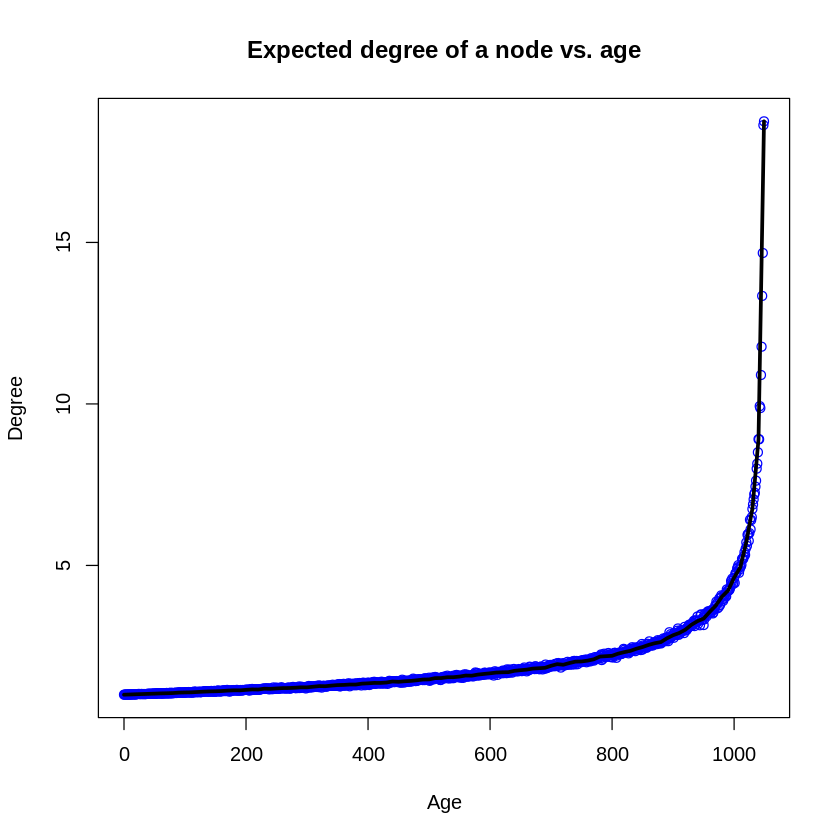

In [ ]:
# iteratively compute the degree 
n <- 1050
deg_age <- matrix(data=0.0, nrow=n, ncol=1)
for (i in 1:n) {
    g <- barabasi.game(n, m=1, directed=F)
    deg_age <- deg_age + degree(g)
}

# mean degree of each age
deg_age = deg_age/n

# plot
plot(c((n-1):0), deg_age, col='blue', ylab="Degree", xlab="Age",
     main="Expected degree of a node vs. age")
lines(lowess(c((n-1):0), deg_age, f=0.01), col="black", lwd=3)

<div class="alert alert-block alert-success">
<b>Answer 2 (f):</b> The relationship between the age of nodes and their expected degree is illustrated in the plot above.
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (g):</b> Repeat the previous parts (a-f) for $m = 2$, and $m = 6$. Compare the results of each part for different values of m.
</div>


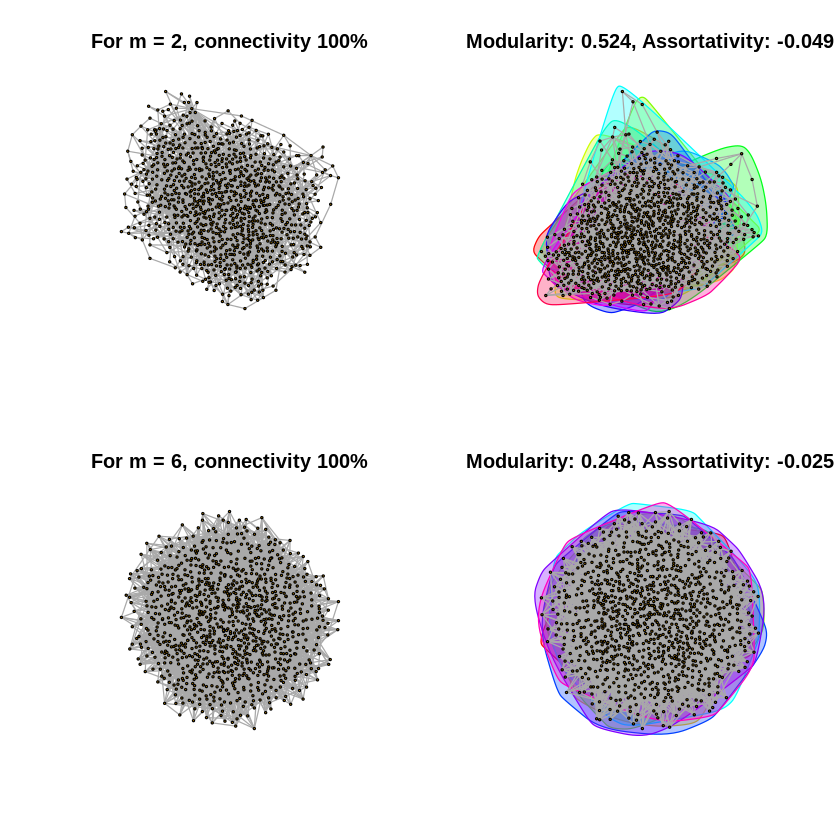

In [ ]:
# '''
# Repeat part 2(a) 2(b)
# '''

# init
ms <- c(2, 6)
par(mfrow=c(2, 2))

# numerically estimate 1000 times
for (m in ms) {

  # part (a)
  count <- 0
  for (i in 1:1000) {
    g <- barabasi.game(1050, m=m, directed=F)
    if (is.connected(g)) {
      count <- count + 1
    }
  }

  # plot
  plot(g, vertex.size=2, vertex.label=NA, 
       main=sprintf("For m = %d, connectivity %d%%", m, (count/1000)*100))

  # part (b)
  comm_struct <- fastgreedy.community(g)
  mod <- modularity(comm_struct)
  # print(sprintf("Modularity: %f",mod))
  assort <- assortativity_degree(g, directed=F)
  # print(sprintf("Degree Assortativity: %f", assort))
  plot(g, mark.groups=groups(comm_struct), vertex.size=2, vertex.label=NA, 
       main=sprintf("Modularity: %.3f, Assortativity: %.3f", mod, assort))
}



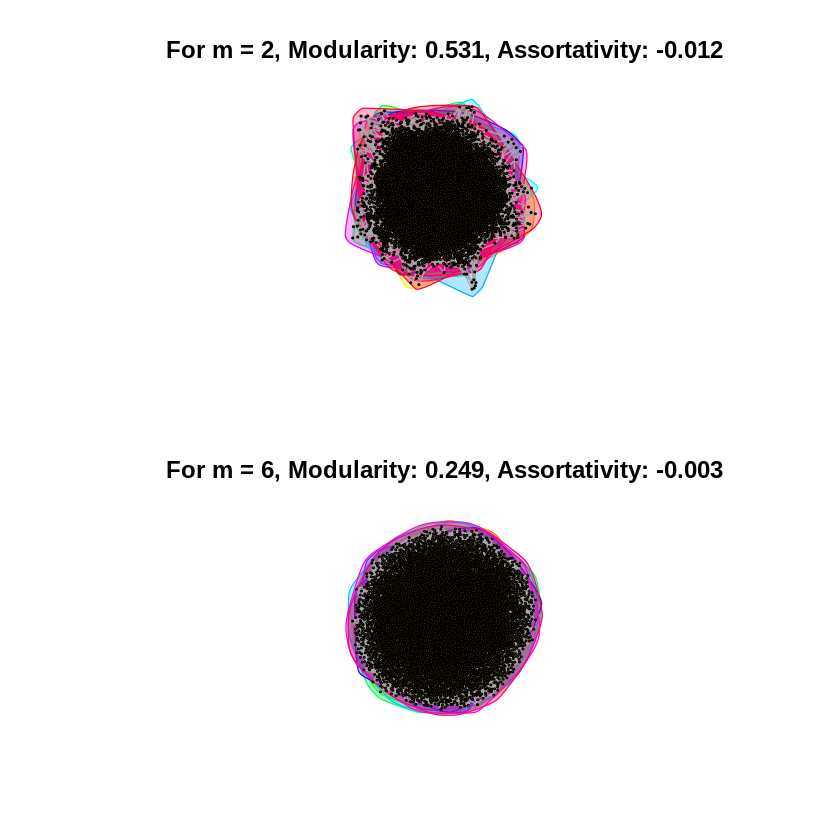

In [ ]:
# '''
# Repeat part 2(c) - larger network n = 10500
# '''

# init
ms <- c(2, 6)
par(mfrow=c(2, 1))

for (m in ms) {
  # create network
  g2 <- barabasi.game(10500, m=m, directed=F)
  comm_struct2 <- fastgreedy.community(g2)
  mod2 <- modularity(comm_struct2)
  assort2 <- assortativity_degree(g2, directed=F)
  plot(g2, mark.groups=groups(comm_struct2), vertex.size=2, vertex.label=NA, 
       main=sprintf("For m = %d, Modularity: %.3f, Assortativity: %.3f", 
                    m, mod2, assort2))
}


[1] "Slope and intercept for n = 1050, m = 2"

Call:
lm(formula = dist_1 ~ deg_1)

Coefficients:
(Intercept)        deg_1  
      1.388       -2.470  

[1] "Slope and intercept for n = 10500, m = 2"

Call:
lm(formula = dist_2 ~ deg_2)

Coefficients:
(Intercept)        deg_2  
     0.5106      -2.1264  

[1] "Slope and intercept for n = 1050, m = 6"

Call:
lm(formula = dist_1 ~ deg_1)

Coefficients:
(Intercept)        deg_1  
       1.70        -2.07  

[1] "Slope and intercept for n = 10500, m = 6"

Call:
lm(formula = dist_2 ~ deg_2)

Coefficients:
(Intercept)        deg_2  
      1.422       -1.977  



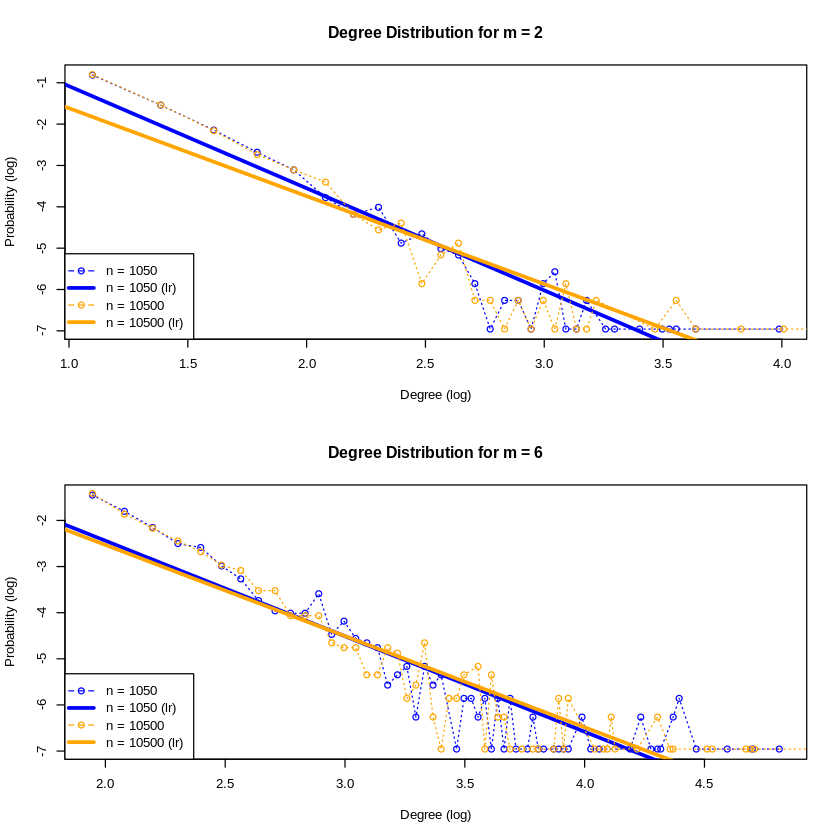

In [ ]:
# '''
# Repeat part 2(d)
# '''

# init
ms <- c(2, 6)
# par(mfrow=c(4, 1))
layout(matrix(c(1,1,2,2), 4, 1, byrow = TRUE))

for (m in ms) {
  # smaller network n = 1050
  g <- barabasi.game(1050, m=m, directed=F)
  degdist_1 <- degree.distribution(g)
  idx_1 <- which(degdist_1 !=0, arr.ind=T)
  deg_1 <- log(seq(1:length(degdist_1)))[idx_1]
  dist_1 <- log(degdist_1)[idx_1]
  plot(deg_1, dist_1, main=sprintf("Degree Distribution for m = %d", m),
      xlab="Degree (log)", ylab="Probability (log)", col="blue")
  lines(deg_1, dist_1, lty=3, col="blue")
  # linear regression
  lr_1 = lm(dist_1 ~ deg_1)
  print(sprintf("Slope and intercept for n = 1050, m = %d", m))
  print(lr_1)
  abline(lr_1, col="blue", lwd=3)


  # larger network n = 10500
  g2 <- barabasi.game(1050, m=m, directed=F)
  degdist_2 <- degree.distribution(g2)
  idx_2 <- which(degdist_2 !=0, arr.ind=T)
  deg_2 <- log(seq(1:length(degdist_2)))[idx_2]
  dist_2 <- log(degdist_2)[idx_2]
  points(deg_2, dist_2, col="orange")
  lines(deg_2, dist_2, lty=3, col="orange")
  # linear regression
  lr_2 = lm(dist_2 ~ deg_2)
  print(sprintf("Slope and intercept for n = 10500, m = %d", m))
  print(lr_2)
  abline(lr_2, col="orange", lwd=3)

  # legend
  legend('bottomleft', lty = c(2, 1, 2, 1), lwd = c(1, 3, 1, 3), pch=c(1, NA, 1, NA),
        legend=c("n = 1050", "n = 1050 (lr)","n = 10500", "n = 10500 (lr)"),
        col=c('blue', 'blue', 'orange', 'orange'))
}

[1] "Slope and intercept for n = 1050, m = 2"

Call:
lm(formula = dist_n1 ~ deg_n1)

Coefficients:
(Intercept)       deg_n1  
    -0.9421      -1.1829  

[1] "Slope and intercept for n = 10500, m = 2"

Call:
lm(formula = dist_n2 ~ deg_n2)

Coefficients:
(Intercept)       deg_n2  
    -0.6466      -1.4216  

[1] "Slope and intercept for n = 1050, m = 6"

Call:
lm(formula = dist_n1 ~ deg_n1)

Coefficients:
(Intercept)       deg_n1  
     -1.014       -1.031  

[1] "Slope and intercept for n = 10500, m = 6"

Call:
lm(formula = dist_n2 ~ deg_n2)

Coefficients:
(Intercept)       deg_n2  
     -1.092       -1.156  



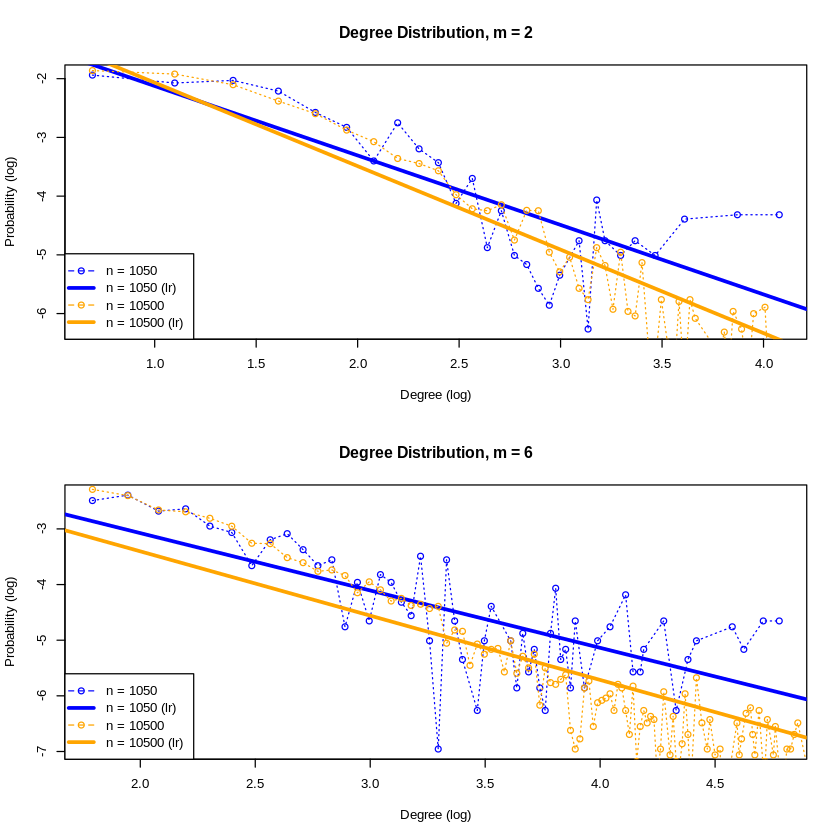

In [ ]:
# '''
# Repeat part 2(e)
# '''

# init
ms <- c(2, 6)
# par(mfrow=c(4, 1))
layout(matrix(c(1,1,2,2), 4, 1, byrow = TRUE))

for (m in ms) {
  # init smaller network n = 1050
  n1 <- 1050
  g <- barabasi.game(n1, m=m, directed=F)
  deg_n1 <- matrix(data=0.0, nrow=n1, ncol=1)

  for (k in 1:n1){
    # randomly pick a node i
    n_i <- sample(n1, 1)
    # corresponding neighbors
    i_js <- neighbors(g, n_i)
    if(length(i_js) > 1){
      # randomly pick a neighbor j
      i_j <- sample(i_js, 1)
      deg_n1[k] = degree(g, i_j)
    } else {
      deg_n1[k] = degree(g, i_js)
    } 
  }
  # get the distribution
  dist_n1 = table(deg_n1)
  # convert to log scale
  deg_n1 = log(as.numeric(names(dist_n1)))
  dist_n1 = log(as.vector(dist_n1)/n1)

  # make the plot
  plot(deg_n1, dist_n1, main=sprintf("Degree Distribution, m = %d", m),
      xlab="Degree (log)", ylab="Probability (log)", col="blue")
  lines(deg_n1, dist_n1, lty=3, col="blue")
  # linear regression
  lr_1 = lm(dist_n1 ~ deg_n1)
  print(sprintf("Slope and intercept for n = 1050, m = %d", m))
  print(lr_1)
  abline(lr_1, col="blue", lwd=3)
  #############################################################################

  # init larger network n = 10500
  n2 <- 10500
  g2 <- barabasi.game(n2, m=m, directed=F)
  deg_n2 <- matrix(data=0.0, nrow=n2, ncol=1)

  for (k in 1:n2){
    # randomly pick a node i
    n_i <- sample(n2, 1)
    # corresponding neighbors
    i_js <- neighbors(g2, n_i)
    if(length(i_js) > 1){
      # randomly pick a neighbor j
      i_j <- sample(i_js, 1)
      deg_n2[k] = degree(g2, i_j)
    } else {
      deg_n2[k] = degree(g2, i_js) 
    }
  }
  # get the distribution
  dist_n2 = table(deg_n2)
  # convert to log scale
  deg_n2 = log(as.numeric(names(dist_n2)))
  dist_n2 = log(as.vector(dist_n2)/n2)

  # make the plot
  points(deg_n2, dist_n2, col="orange")
  lines(deg_n2, dist_n2, lty=3, col="orange")
  # linear regression
  lr_2 = lm(dist_n2 ~ deg_n2)
  print(sprintf("Slope and intercept for n = 10500, m = %d", m))
  print(lr_2)
  abline(lr_2, col="orange", lwd=3)

  # legend
  legend('bottomleft', lty = c(2, 1, 2, 1), lwd = c(1, 3, 1, 3), pch=c(1, NA, 1, NA),
        legend=c("n = 1050", "n = 1050 (lr)", "n = 10500", "n = 10500 (lr)"),
        col=c('blue', 'blue', 'orange', 'orange'))
}

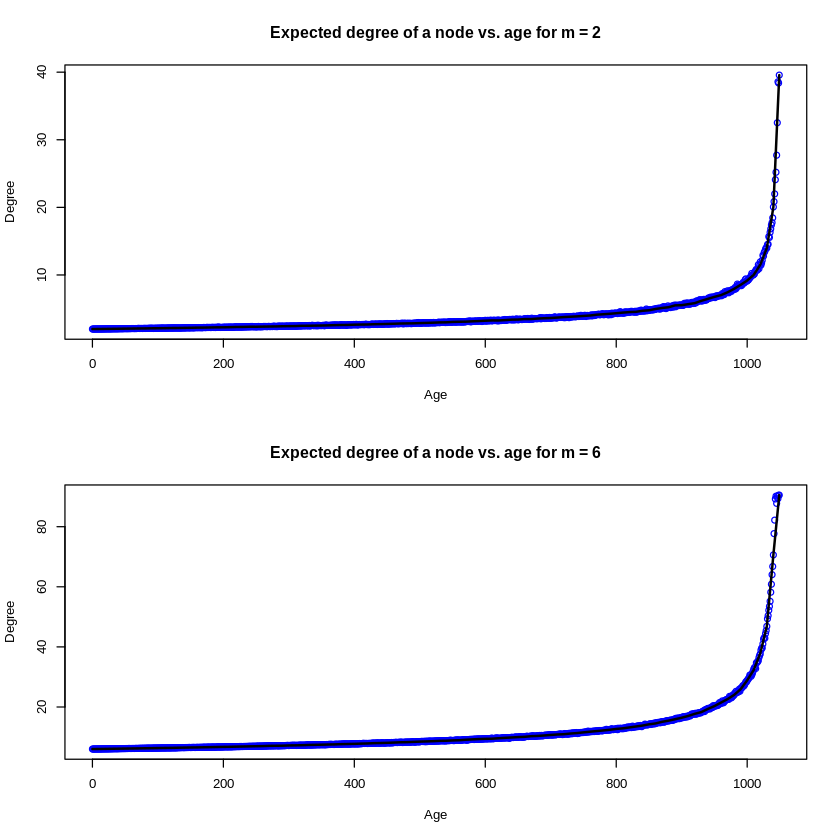

In [ ]:
# '''
# Repeat part 2(f)
# '''

# init
ms <- c(2, 6)
# par(mfrow=c(4, 1))
layout(matrix(c(1,1,2,2), 4, 1, byrow = TRUE))

for (m in ms) {
  # iteratively compute the degree 
  n <- 1050
  deg_age <- matrix(data=0.0, nrow=n, ncol=1)
  for (i in 1:n) {
      g <- barabasi.game(n, m=m, directed=F)
      deg_age <- deg_age + degree(g)
  }

  # mean degree of each age
  deg_age = deg_age/n

  # plot
  plot(c((n-1):0), deg_age, col='blue', ylab="Degree", xlab="Age",
      main=sprintf("Expected degree of a node vs. age for m = %d", m))
  lines(lowess(c((n-1):0), deg_age, f=0.01), col="black", lwd=2)
}

<div class="alert alert-block alert-success">
<b>Answer 2 (g):</b> All the results are shown above.
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (h):</b> Again, generate a preferential attachment network with n = 1050, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.
</div>


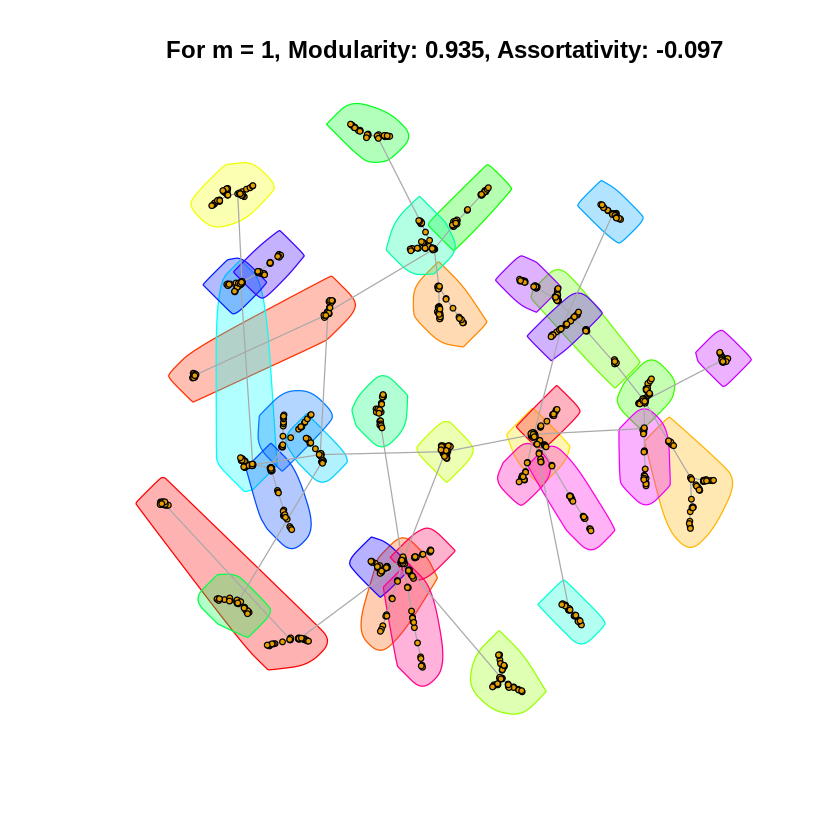

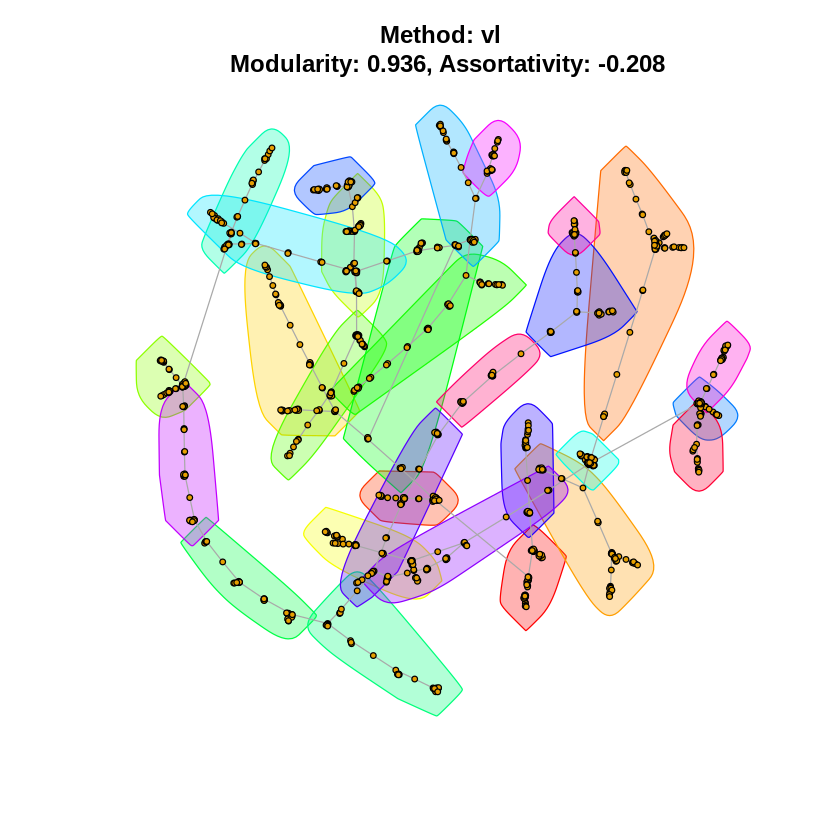

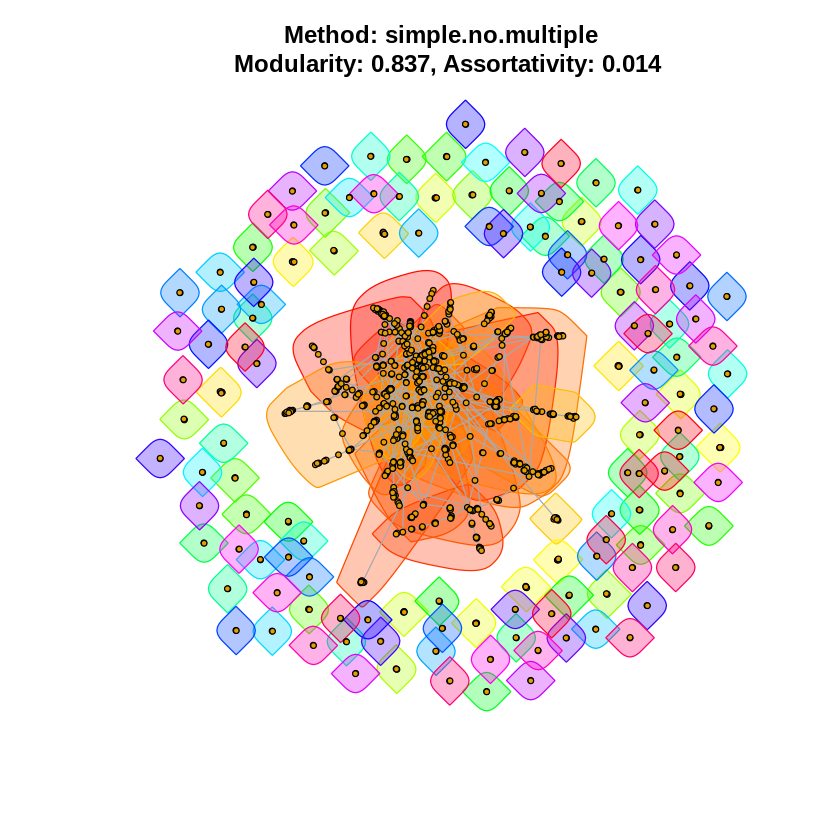

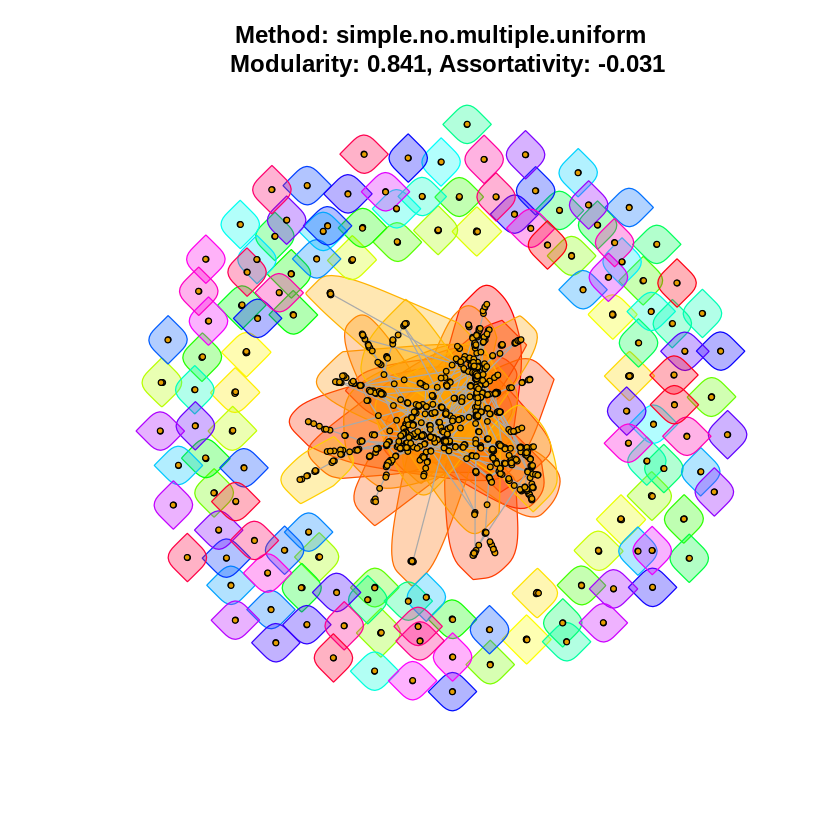

In [ ]:
# create the original network and plot the community structure
g <- barabasi.game(1050, m=1, directed=F)
comm_struct <- fastgreedy.community(g)
mod <- modularity(comm_struct)
assort <- assortativity_degree(g, directed=F)
plot(g, mark.groups=groups(comm_struct), vertex.size=2, vertex.label=NA,
     main=sprintf("For m = %d, Modularity: %.3f, Assortativity: %.3f", 1, mod, assort))

# find the degree sequence through submatching methods and create new network
methods = c("vl", "simple.no.multiple", "simple.no.multiple.uniform")
for (method in methods) {
  g_sub <- sample_degseq(degree(g), method=method)
  comm_struct_sub <- fastgreedy.community(g_sub)
  mod_sub <- modularity(comm_struct_sub)
  assort_sub <- assortativity_degree(g_sub, directed=F)
  plot(g_sub, mark.groups=groups(comm_struct_sub), vertex.size=2, vertex.label=NA,
      main=sprintf("Method: %s \n Modularity: %.3f, Assortativity: %.3f", 
                   method, mod_sub, assort_sub))
}

<div class="alert alert-block alert-success">
<b>Answer 2 (h):</b> Based on the result shown above, one can observe that for sub-matching with methods ""simple.no.multiple" and "simple.no.multiple.uniform", they tend to generate a network with a significant number of unconnected vertices, whereas the network generated through preferential attachment model or "Viger-Latapy" method shows more local high-connected regions and sparse connections among individual communities. This is also reflect in the modularity value of each network, i.e. preferential attachment model and "Viger-Latapy" method generally yield has higher modularity than the other two sub-matching methods.
</div>

## 3. Create a modified preferential attachment model that penalizes the age of a node

<div class="alert alert-block alert-success">
<b>Question 3 (a):</b> Each time a new vertex is added, it creates m links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. In particular, the probability that a newly added vertex connects to an old vertex is proportional to:
$$
P[i] \sim (ck^{\alpha}_{i}+a)(dl^{\beta}_{i}+b)
$$
where $k_{i}$ is the degree of vertex i in the current time step, and $l_{i}$ is the age of vertex i. Produce such an undirected network with 1050 nodesand parameters $m = 1$, $\alpha = 1$, $\beta = −1$, and $a = c = d = 1$, $b = 0$. Plot the degree distribution. What is the power law exponent?
</div>

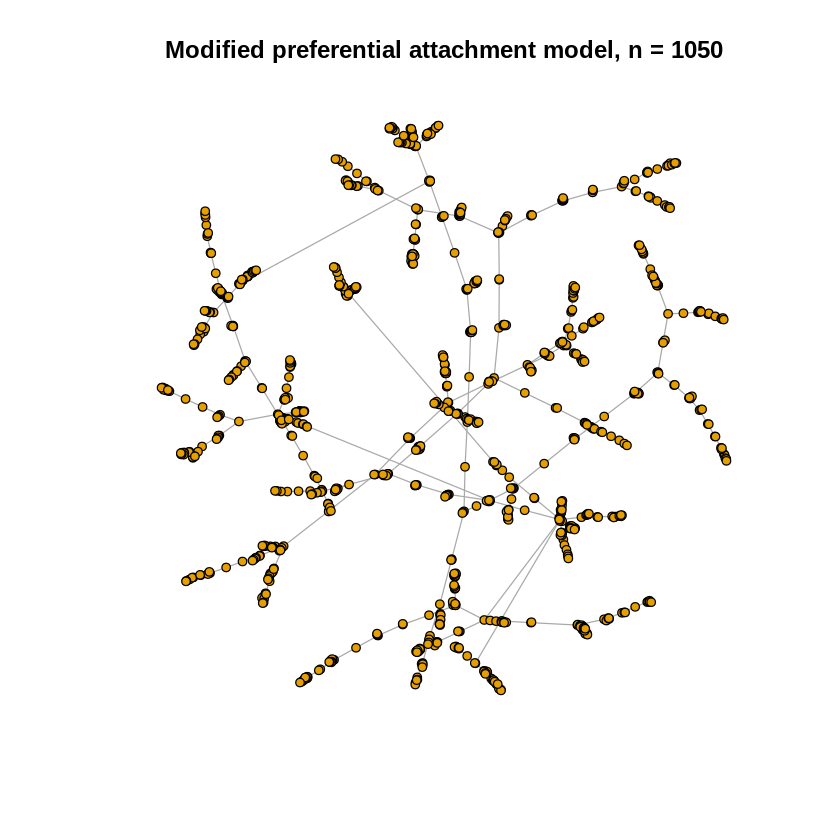

[1] "Slope and intercept for modified preferential attachment model:"

Call:
lm(formula = dist_mod ~ deg_mod)

Coefficients:
(Intercept)      deg_mod  
      2.229       -3.396  



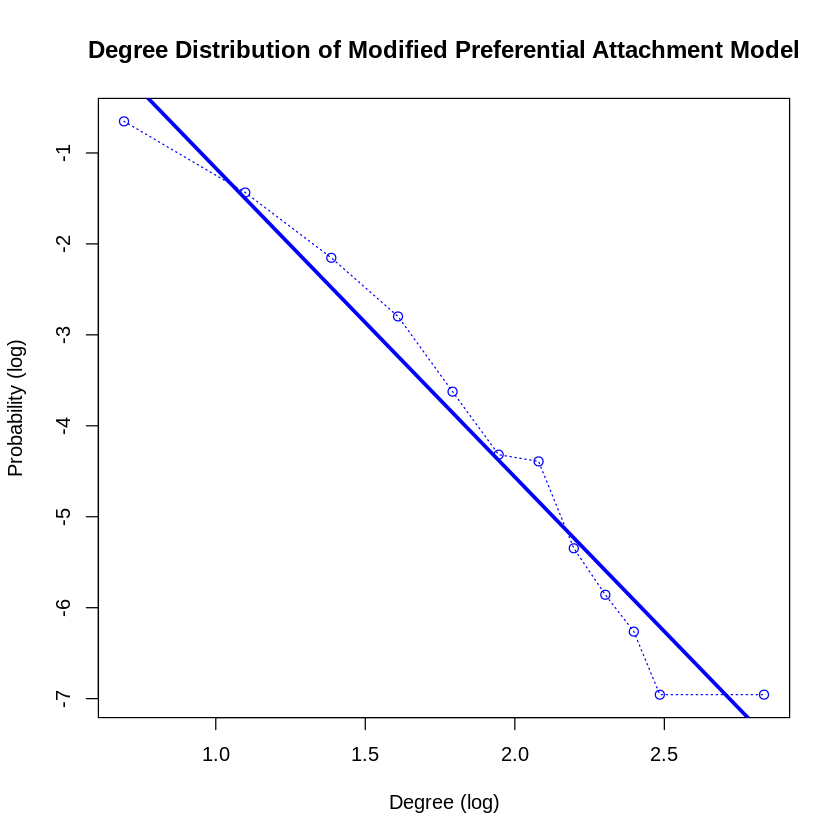

In [ ]:
# Modified preferential attachment model
g_mod <- sample_pa_age(n=1050, directed=F, m=1, 
                       pa.exp=1, aging.exp=-1, 
                       deg.coef=1, age.coef=1, 
                       zero.deg.appeal=1, zero.age.appeal=0)
plot(g_mod, vertex.size=3, vertex.label=NA,
     main="Modified preferential attachment model, n = 1050")

# degree distribution
degdist_mod <- degree.distribution(g_mod)
idx_mod <- which(degdist_mod !=0, arr.ind=T)
deg_mod <- log(seq(1:length(degdist_mod)))[idx_mod]
dist_mod <- log(degdist_mod)[idx_mod]
plot(deg_mod, dist_mod, main="Degree Distribution of Modified Preferential Attachment Model",
     xlab="Degree (log)", ylab="Probability (log)", col="blue")
lines(deg_mod, dist_mod, lty=3, col="blue")
# linear regression
lr_mod = lm(dist_mod ~ deg_mod)
print("Slope and intercept for modified preferential attachment model:")
print(lr_mod)
abline(lr_mod, col="blue", lwd=3)

<div class="alert alert-block alert-success">
<b>Answer 3 (a):</b> The results are shown above. Since the negative slope of the linear regression line for $n = 1050$ is 3.396, the power law exponent is 3.396.
</div>

<div class="alert alert-block alert-success">
<b>Question 3 (b):</b> Use fast greedy method to find the community structure. What is the modularity?
</div>



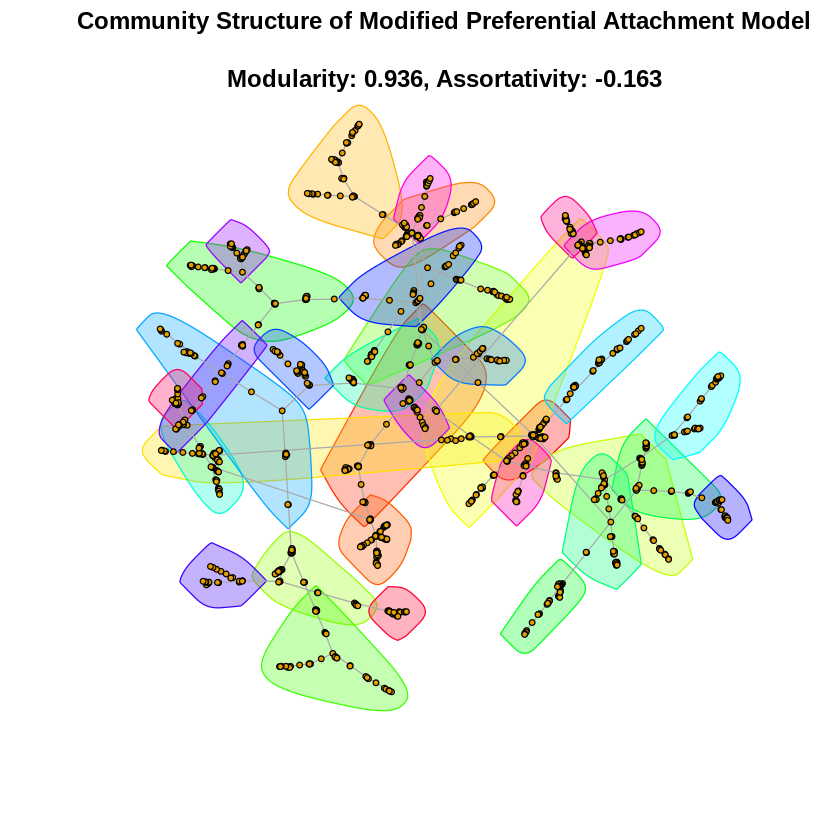

In [ ]:
comm_struct_mod <- fastgreedy.community(g_mod)
mod_mod <- modularity(comm_struct_mod)
assort_mod <- assortativity_degree(g_mod, directed=F)
plot(g_mod, mark.groups=groups(comm_struct_mod), vertex.size=2, vertex.label=NA,
     main=sprintf("Community Structure of Modified Preferential Attachment Model
                  \nModularity: %.3f, Assortativity: %.3f", mod_mod, assort_mod))

<div class="alert alert-block alert-success">
<b>Answer 3 (b):</b> The modularity is 0.936.
</div>

# 2. Random Walk on Networks

In [ ]:
# install packages
install.packages("igraph")
install.packages("matrix")
install.packages("pracma")
install.packages("resample")

# load libraries
library("igraph")
library ("Matrix")
library ("pracma")
library("resample")

## 1. Random walk on Erdös-Rényi networks

<div class="alert alert-block alert-success">
<b>Question 1 (a):</b> Create an undirected random network with 900 nodes, and the probability p for drawing an edge between any pair of nodes equal to 0.015.
</div>

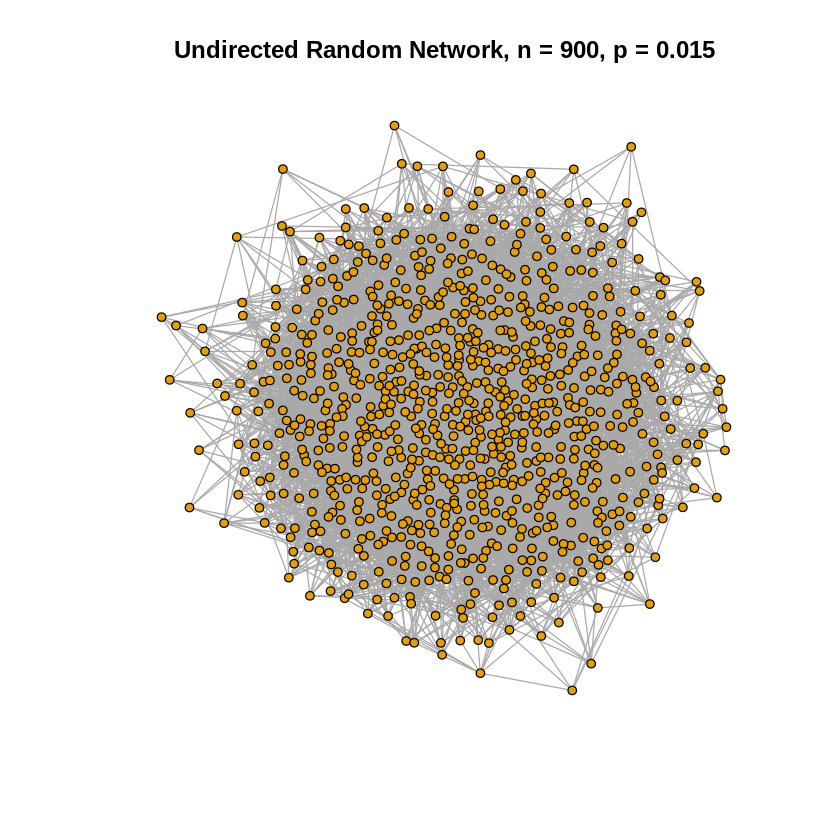

In [ ]:
n <- 900
p <- 0.015
g <- random.graph.game(n=n, p=p, directed=F)
plot(g, vertex.size=3, vertex.label=NA,
     main="Undirected Random Network, n = 900, p = 0.015")

<div class="alert alert-block alert-success">
<b>Answer 1 (a):</b> The result is shown above.
</div>

<div class="alert alert-block alert-success">
<b>Question 1 (b):</b> Let a random walker start from a randomly selected node (no teleportation). We use t to denote the number of steps that the walker has taken. Measure the average distance (defined as the shortest path length) $⟨s(t)⟩$ of the walker from his starting point at step t. Also, measure the variance $σ^{2}(t) = ⟨(s(t)−⟨s(t)⟩)^{2}⟩$ of this distance. Plot $⟨s(t)⟩$ v.s. t and $σ^{2}(t)$ v.s. t. Here, the average $⟨·⟩$ is over random choices of the starting nodes.
</div>

<div class="alert alert-block alert-success">
<b>Question 1 (c):</b> Measure the degree distribution of the nodes reached at the end of the random walk. How does it compare to the degree distribution of graph?
</div>



In [ ]:
n <- 900
p <- 0.015
n_iteration <- 1000
t <- 100
results <- matrix(data=0.0, nrow=n_iteration, ncol=t)
last_vertex_degrees <- matrix(data=0.0, nrow=n_iteration, ncol=1)

for (i in 1:n_iteration) {
  # get the random walk network
  g <- random.graph.game(n=n, p=p, directed=F)
  if (is.connected(g)) {
    gcc <- g
  } else {
    g_components <- clusters(g)
    ix <- which.max(g_components$csize)
    gcc <- induced.subgraph(g, which(g_components$membership == ix))
  }

  # randonly select one vertex
  start <- sample(V(gcc), 1)
  # start random walk
  walked_vertices <- random_walk(gcc, steps=t, start)
  # find shortest path
  results[i,] <- shortest.paths(gcc, walked_vertices, start)
  # get last vertex
  last_vertex <- walked_vertices[t]
  # get degree of last vertex
  last_vertex_degrees[i, 1] <- degree(gcc, last_vertex)
}

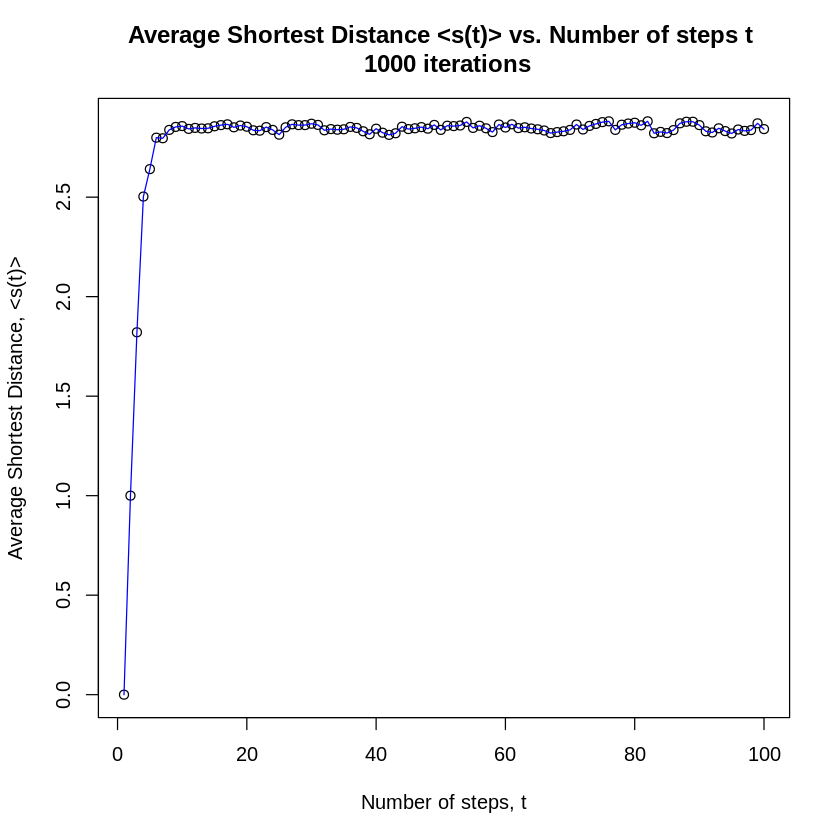

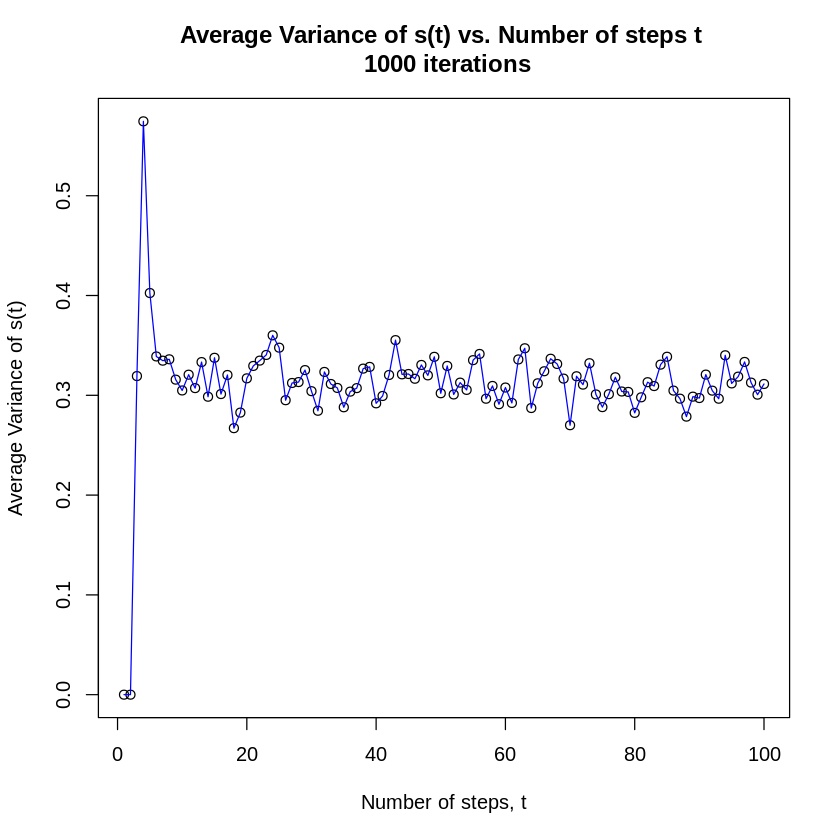

In [ ]:
plot(seq(t), colMeans(results), 
     main=sprintf("Average Shortest Distance <s(t)> vs. Number of steps t \n %d iterations", 
                  n_iteration),
     xlab = "Number of steps, t", ylab = "Average Shortest Distance, <s(t)>")
lines(seq(t), colMeans(results), col="blue")

plot(seq(t), colVars(results), 
     main=sprintf("Average Variance of s(t) vs. Number of steps t \n %d iterations", 
                  n_iteration),
     xlab = "Number of steps, t", ylab = "Average Variance of s(t)")
lines(seq(t), colVars(results), col="blue")

<div class="alert alert-block alert-success">
<b>Answer 1 (b):</b> The results are shown above.
</div>

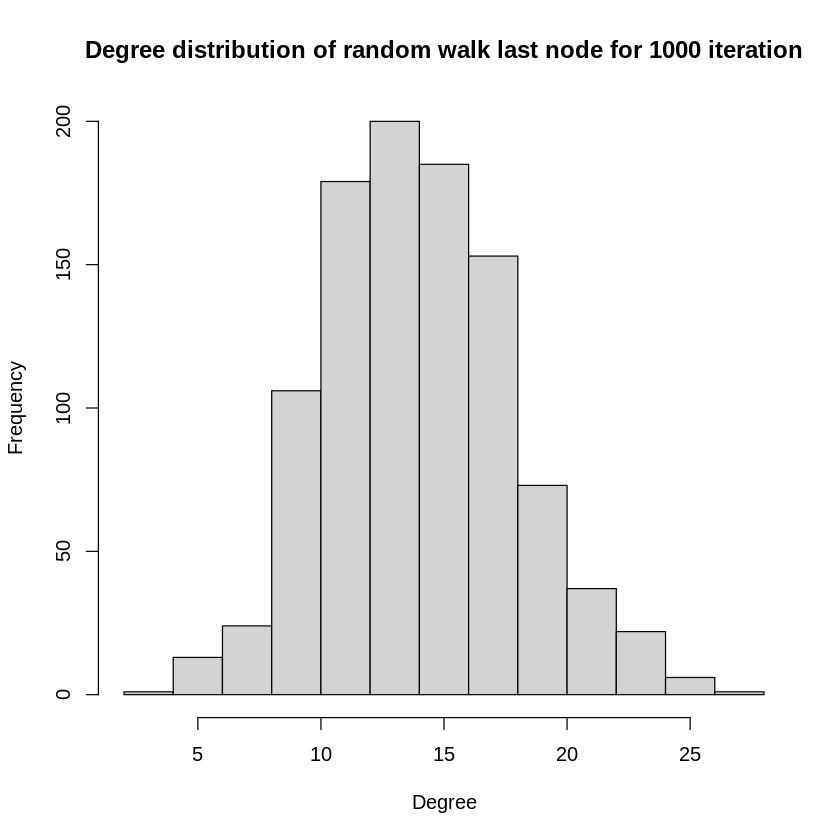

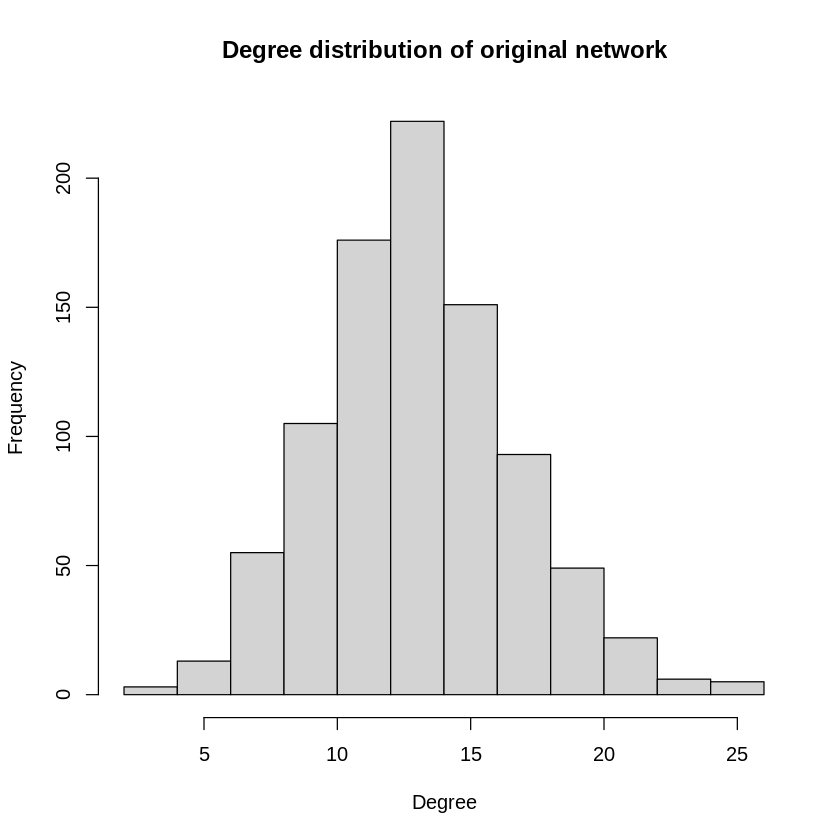

In [ ]:
hist(last_vertex_degrees, xlab='Degree', ylab='Frequency', 
     main="Degree distribution of random walk last node for 1000 iteration")
hist(degree(g), xlab='Degree', ylab='Frequency', 
     main="Degree distribution of original network")

<div class="alert alert-block alert-success">
<b>Answer 1 (c):</b> The degree distribution of the nodes reached at the end of the random walk is plotted above. One can observe that after a large enough iterations of random walk (greater or equal to the number of nodes), a similar degree distribution can be yielded.
</div>

In [ ]:
print(sprintf("Diameter of original network of %d nodes: %d", n, diameter(g)))

[1] "Diameter of original network of 900 nodes: 5"


<div class="alert alert-block alert-success">
<b>Question 1 (d):</b> Repeat 1(b) for undirected random networks with 9000 nodes. Compare the results and explain qualitatively. Does the diameter of the network play a role?
</div>



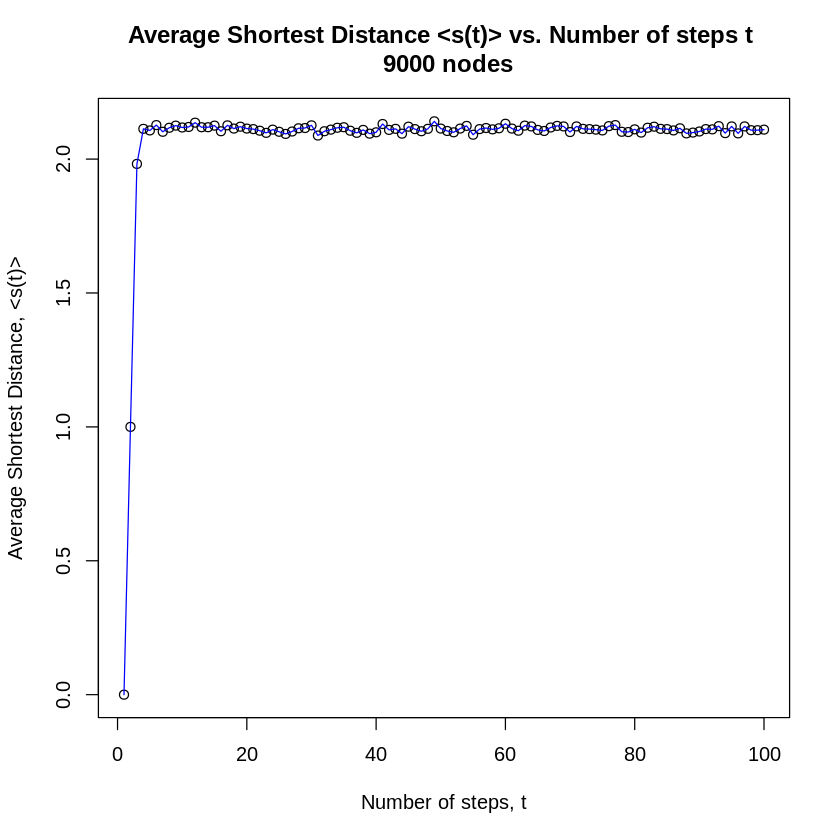

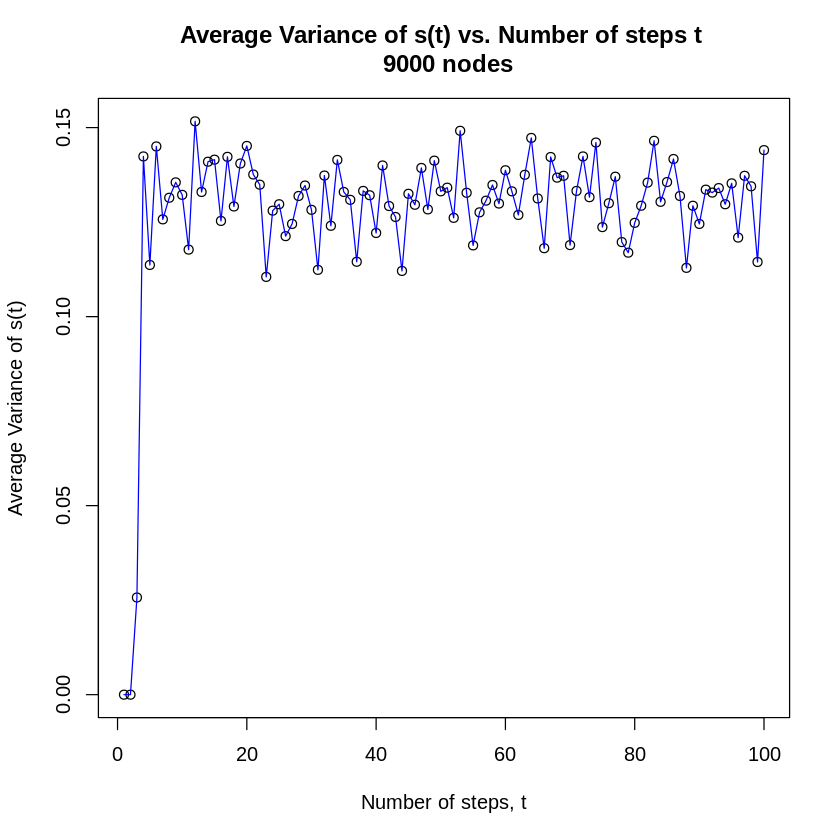

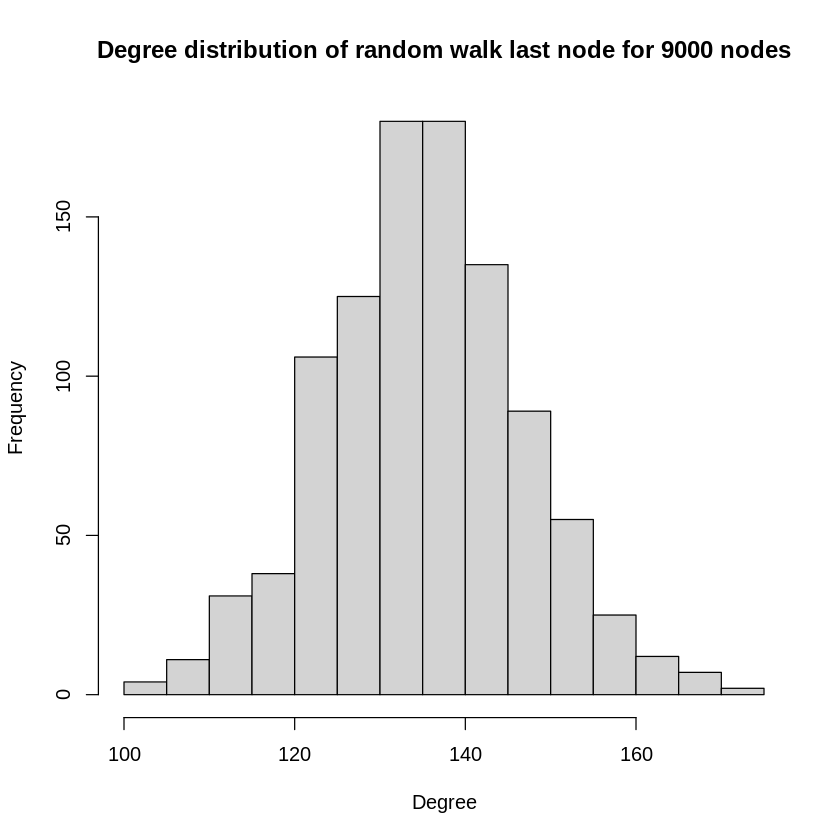

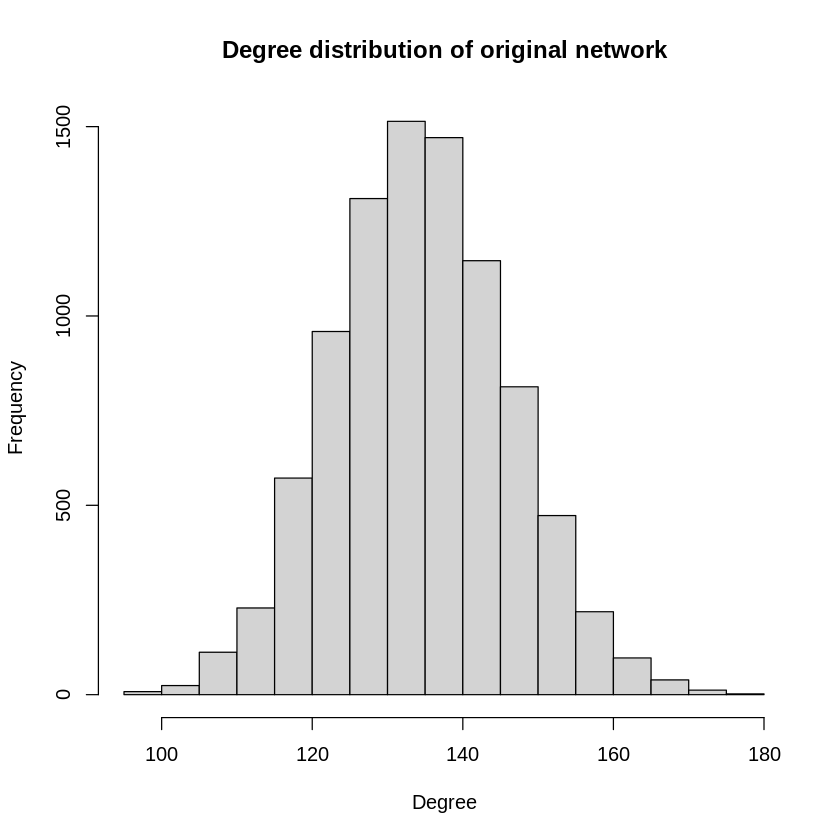

In [ ]:
n <- 9000
p <- 0.015
n_iteration <- 1000
t <- 100
results <- matrix(data=0.0, nrow=n_iteration, ncol=t)
last_vertex_degrees <- matrix(data=0.0, nrow=n_iteration, ncol=1)

for (i in 1:n_iteration) {
  # get the random walk network
  g <- random.graph.game(n=n, p=p, directed=F)
  if (is.connected(g)) {
    gcc <- g
  } else {
    g_components <- clusters(g)
    ix <- which.max(g_components$csize)
    gcc <- induced.subgraph(g, which(g_components$membership == ix))
  }

  # randonly select one vertex
  start <- sample(V(gcc), 1)
  # start random walk
  walked_vertices <- random_walk(gcc, steps=t, start)
  # find shortest path
  results[i,] <- shortest.paths(gcc, walked_vertices, start)
  # get last vertex
  last_vertex <- walked_vertices[t]
  # get degree of last vertex
  last_vertex_degrees[i, 1] <- degree(gcc, last_vertex)
}

plot(seq(t), colMeans(results), 
     main=sprintf("Average Shortest Distance <s(t)> vs. Number of steps t \n %d nodes", n),
     xlab = "Number of steps, t", ylab = "Average Shortest Distance, <s(t)>")
lines(seq(t), colMeans(results), col="blue")

plot(seq(t), colVars(results), 
     main=sprintf("Average Variance of s(t) vs. Number of steps t \n %d nodes", n),
     xlab = "Number of steps, t", ylab = "Average Variance of s(t)")
lines(seq(t), colVars(results), col="blue")

hist(last_vertex_degrees, xlab='Degree', ylab='Frequency', 
     main="Degree distribution of random walk last node for 9000 nodes")
hist(degree(g), xlab='Degree', ylab='Frequency', 
     main="Degree distribution of original network")

In [ ]:
print(sprintf("Diameter of original network of %d nodes: %d", n, diameter(g)))

[1] "Diameter of original network of 9000 nodes: 3"


<div class="alert alert-block alert-success">
<b>Answer 1 (d):</b> By comparing the average shortest distance and average variance plos, one can observe that with larger network size (more nodes), the average shortest distance and variance of random walk converge faster, i.e. after fewer steps, and to lower value, which also makes sense as the larger the network is, the higher the network complexity and connectivity are. Therefore, it requires shorter distance to reach any two random nodes and the variance would also be reduced. As for the diameter of the network, it also plays an important role to prove that the network connectivity is getting higher by larger network, which is 3 compared to 5 in smaller network based on the experiment at here. Lower diameter of the network means the maximum distance between the vertices of the network is smaller.
</div>

## 2. Random walk on networks with fat-tailed degree distribution

<div class="alert alert-block alert-success">
<b>Question 2 (a):</b> Generate an undirected preferential attachment network with 900 nodes, where each new node attaches to m = 1 old nodes.
</div>

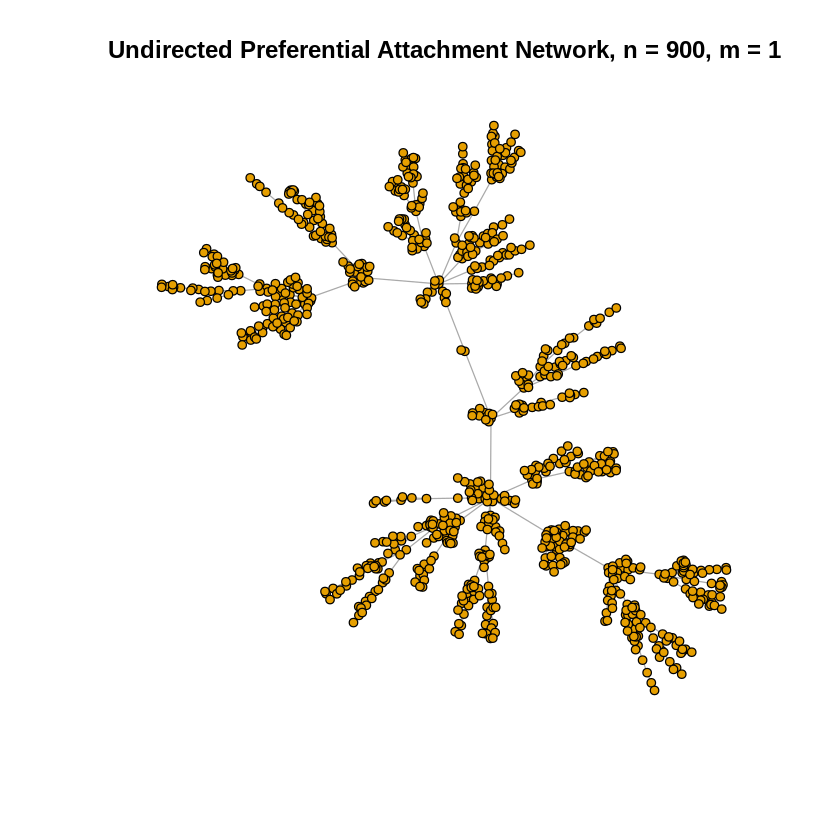

In [ ]:
n <- 900
m <- 1
g <- barabasi.game(n, m=m, directed=F)
plot(g, vertex.size=3, vertex.label=NA,
     main="Undirected Preferential Attachment Network, n = 900, m = 1")

<div class="alert alert-block alert-success">
<b>Answer 2 (a):</b> The result is shown above.
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (b):</b> Let a random walker start from a randomly selected node. Measure and plot $⟨s(t)⟩$ v.s. t and $σ^{2}(t)$ v.s. t.
</div>

<div class="alert alert-block alert-success">
<b>Question 2 (c):</b> Measure the degree distribution of the nodes reached at the end of the random walk on this network. How does it compare with the degree distribution of the graph?
</div>



In [ ]:
n <- 900
m <- 1
n_iteration <- 1000
t <- 100
results <- matrix(data=0.0, nrow=n_iteration, ncol=t)
last_vertex_degrees <- matrix(data=0.0, nrow=n_iteration, ncol=1)

for (i in 1:n_iteration) {
  # get the random walk network
  g <- barabasi.game(n, m=m, directed=F)
  if (is.connected(g)) {
    gcc <- g
  } else {
    g_components <- clusters(g)
    ix <- which.max(g_components$csize)
    gcc <- induced.subgraph(g, which(g_components$membership == ix))
  }

  # randonly select one vertex
  start <- sample(V(gcc), 1)
  # start random walk
  walked_vertices <- random_walk(gcc, steps=t, start)
  # find shortest path
  results[i,] <- shortest.paths(gcc, walked_vertices, start)
  # get last vertex
  last_vertex <- walked_vertices[t]
  # get degree of last vertex
  last_vertex_degrees[i, 1] <- degree(gcc, last_vertex)
}

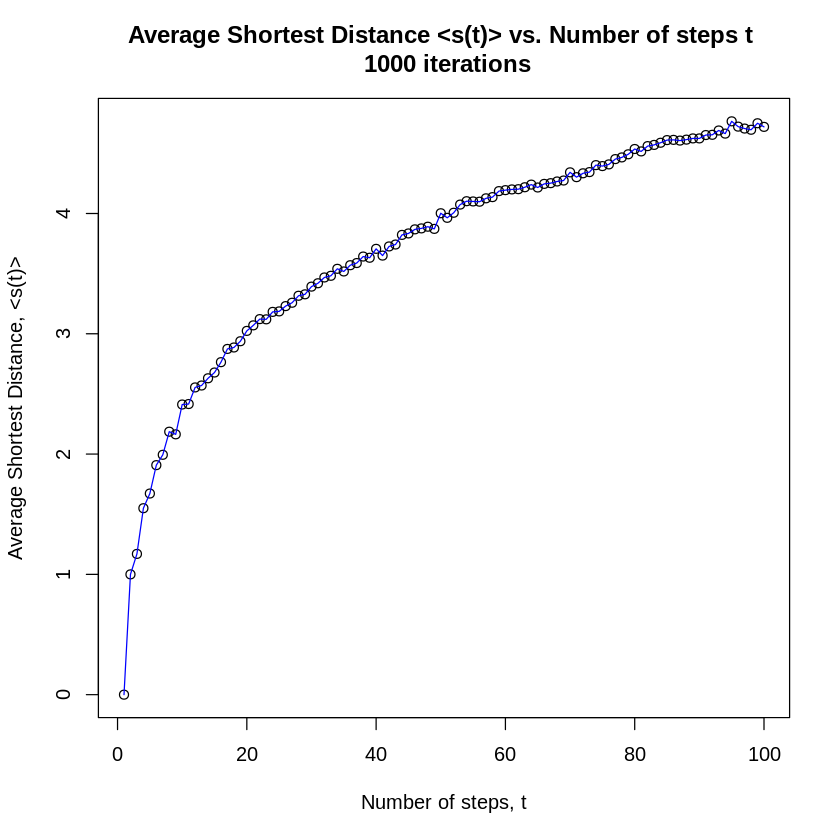

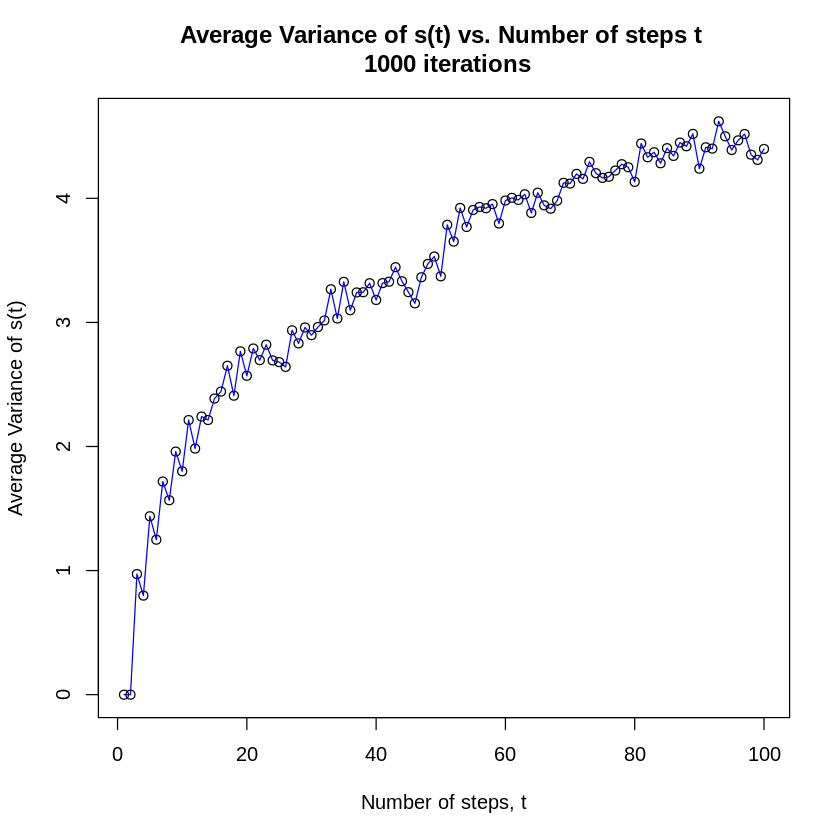

In [ ]:
plot(seq(t), colMeans(results), 
     main=sprintf("Average Shortest Distance <s(t)> vs. Number of steps t \n %d iterations", 
                  n_iteration),
     xlab = "Number of steps, t", ylab = "Average Shortest Distance, <s(t)>")
lines(seq(t), colMeans(results), col="blue")

plot(seq(t), colVars(results), 
     main=sprintf("Average Variance of s(t) vs. Number of steps t \n %d iterations", 
                  n_iteration),
     xlab = "Number of steps, t", ylab = "Average Variance of s(t)")
lines(seq(t), colVars(results), col="blue")

<div class="alert alert-block alert-success">
<b>Answer 2 (b):</b> The results are shown above.
</div>

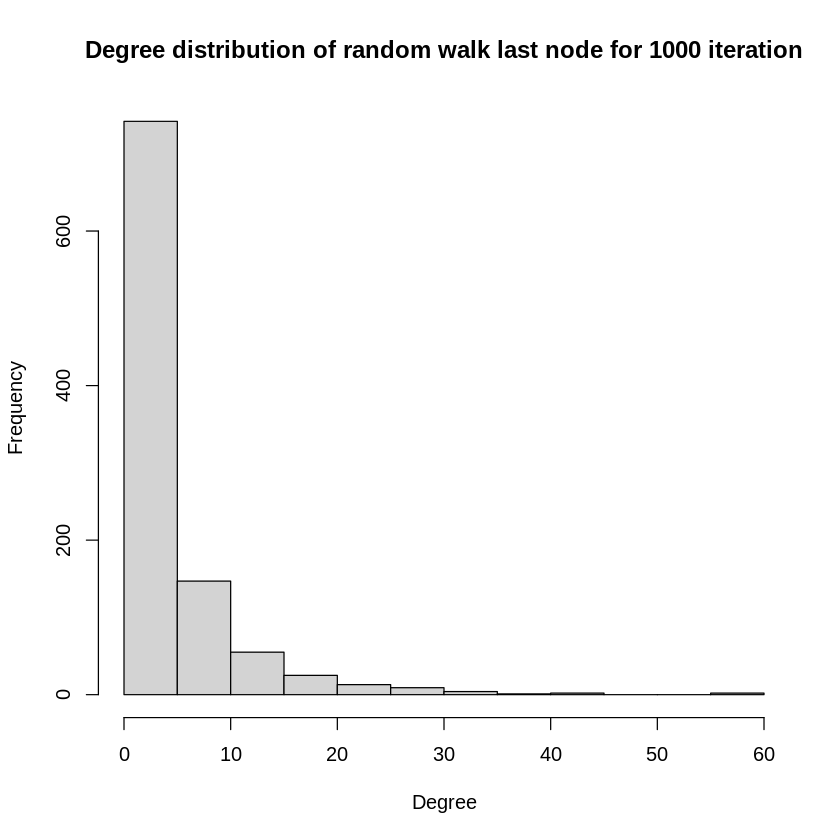

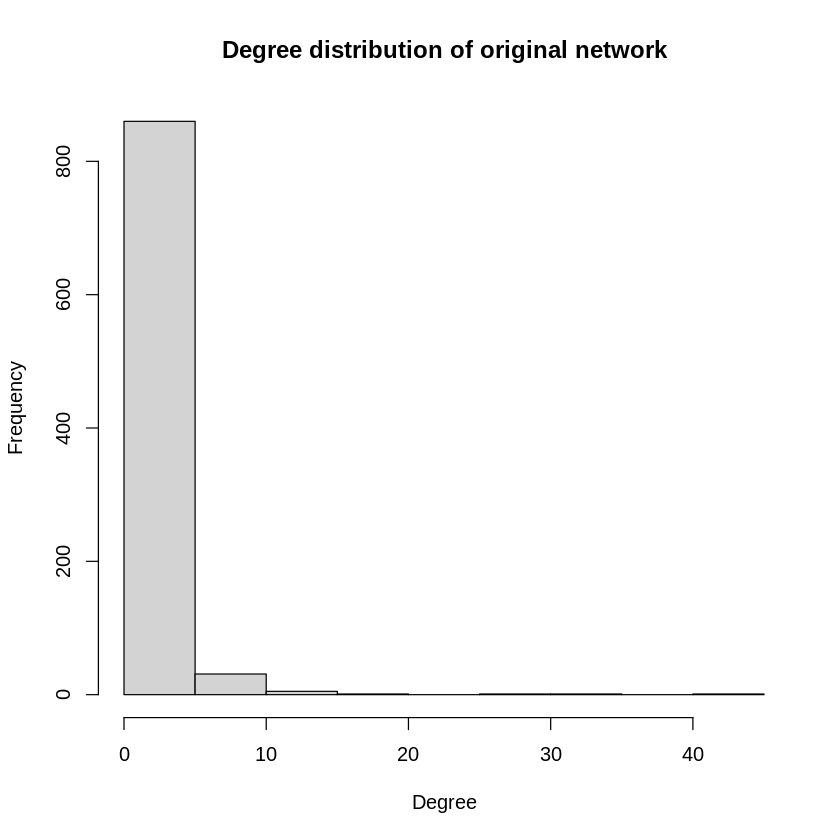

In [ ]:
hist(last_vertex_degrees, xlab='Degree', ylab='Frequency', 
     main="Degree distribution of random walk last node for 1000 iteration")
hist(degree(g), xlab='Degree', ylab='Frequency', 
     main="Degree distribution of original network")

<div class="alert alert-block alert-success">
<b>Answer 2 (c):</b> The degree distribution of the nodes reached at the end of the random walk is plotted above. Overall, tendency of the distribution looks similar. We do can observe a slightly little frequency increase in higher degree at random walk. This, however, is expected since for large enough number of steps in a random walk of preferential attachment models, will reach to a steady state in a preferential manner, where the higher degree node has a higher probability of getting selected as the last node.
</div>

In [ ]:
print(sprintf("Diameter of original network of %d nodes: %d", n, diameter(g)))

[1] "Diameter of original network of 900 nodes: 19"


<div class="alert alert-block alert-success">
<b>Question 2 (d):</b> Repeat 2(b) for preferential attachment networks with 90 and 9000 nodes, and m = 1. Compare the results and explain qualitatively. Does the diameter of the network play a role?
</div>

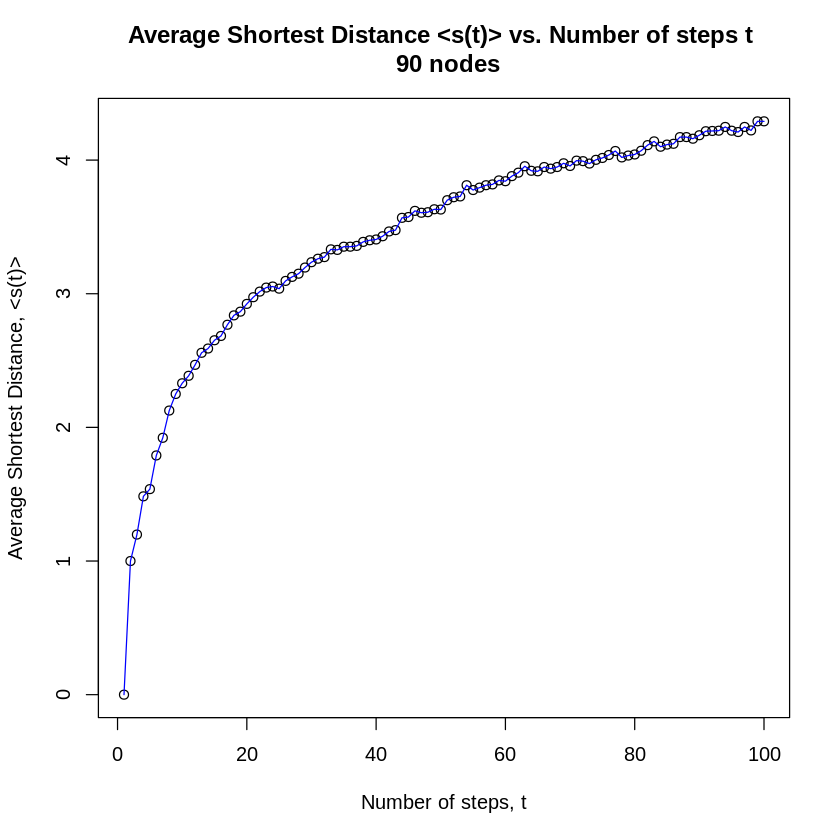

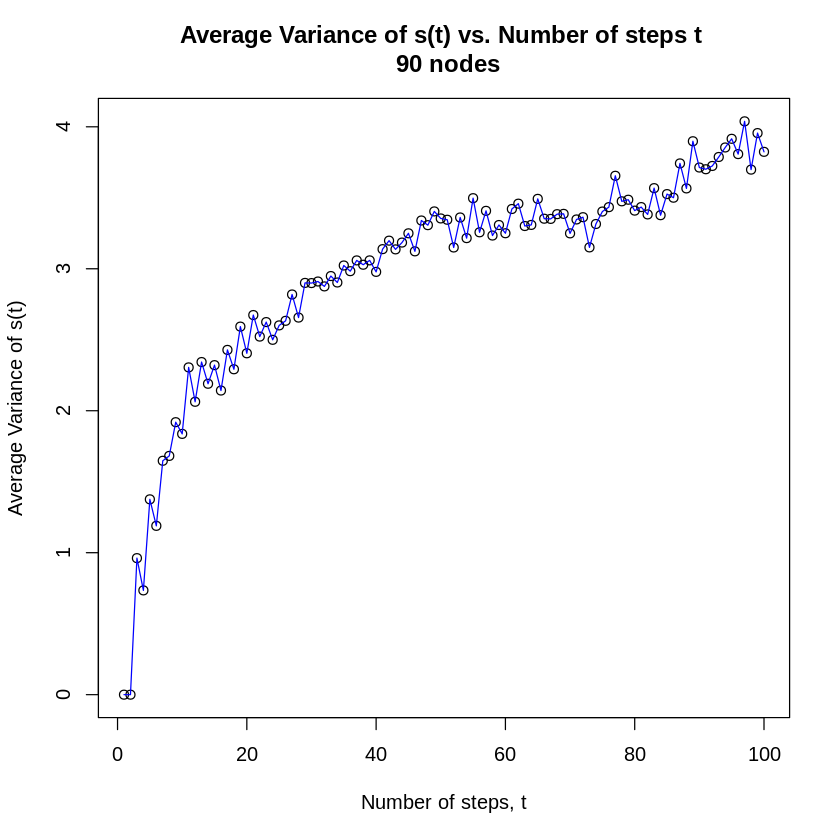

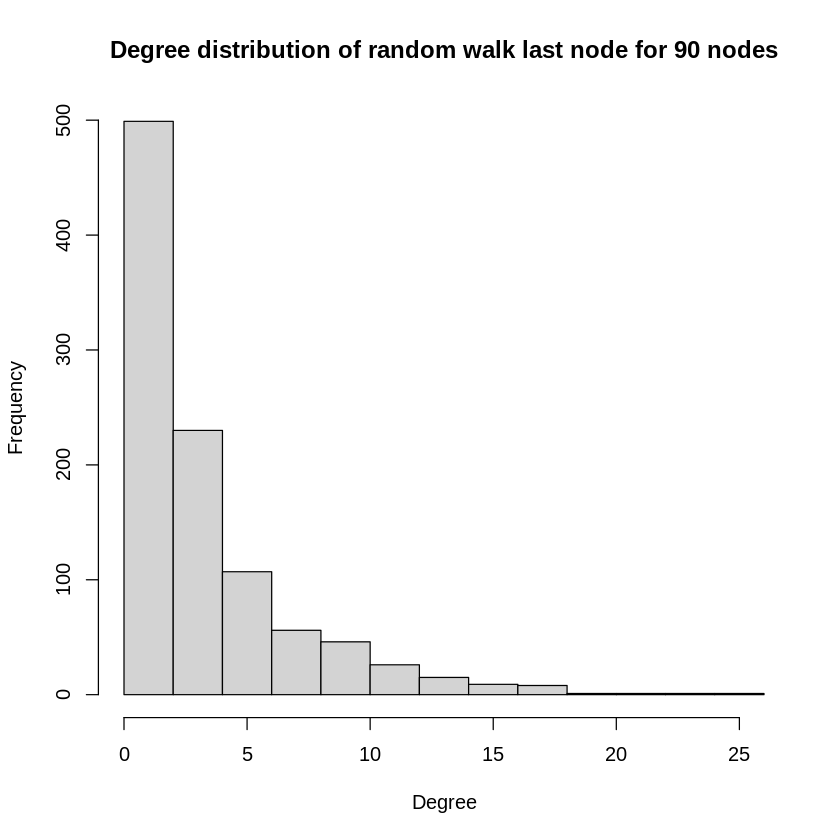

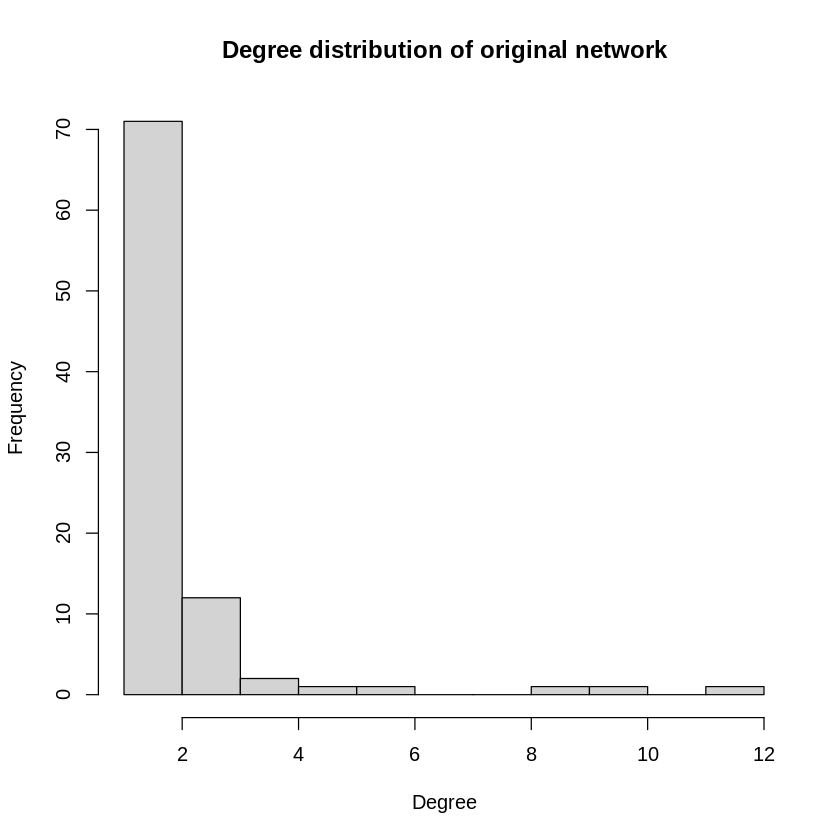

In [ ]:
n <- 90
m <- 1
n_iteration <- 1000
t <- 100
results <- matrix(data=0.0, nrow=n_iteration, ncol=t)
last_vertex_degrees <- matrix(data=0.0, nrow=n_iteration, ncol=1)

for (i in 1:n_iteration) {
  # get the random walk network
  g <- barabasi.game(n, m=m, directed=F)
  if (is.connected(g)) {
    gcc <- g
  } else {
    g_components <- clusters(g)
    ix <- which.max(g_components$csize)
    gcc <- induced.subgraph(g, which(g_components$membership == ix))
  }

  # randonly select one vertex
  start <- sample(V(gcc), 1)
  # start random walk
  walked_vertices <- random_walk(gcc, steps=t, start)
  # find shortest path
  results[i,] <- shortest.paths(gcc, walked_vertices, start)
  # get last vertex
  last_vertex <- walked_vertices[t]
  # get degree of last vertex
  last_vertex_degrees[i, 1] <- degree(gcc, last_vertex)
}

plot(seq(t), colMeans(results), 
     main=sprintf("Average Shortest Distance <s(t)> vs. Number of steps t \n %d nodes", n),
     xlab = "Number of steps, t", ylab = "Average Shortest Distance, <s(t)>")
lines(seq(t), colMeans(results), col="blue")

plot(seq(t), colVars(results), 
     main=sprintf("Average Variance of s(t) vs. Number of steps t \n %d nodes", n),
     xlab = "Number of steps, t", ylab = "Average Variance of s(t)")
lines(seq(t), colVars(results), col="blue")

hist(last_vertex_degrees, xlab='Degree', ylab='Frequency', 
     main="Degree distribution of random walk last node for 90 nodes")
hist(degree(g), xlab='Degree', ylab='Frequency', 
     main="Degree distribution of original network")

In [ ]:
print(sprintf("Diameter of original network of %d nodes: %d", n, diameter(g)))

[1] "Diameter of original network of 90 nodes: 11"


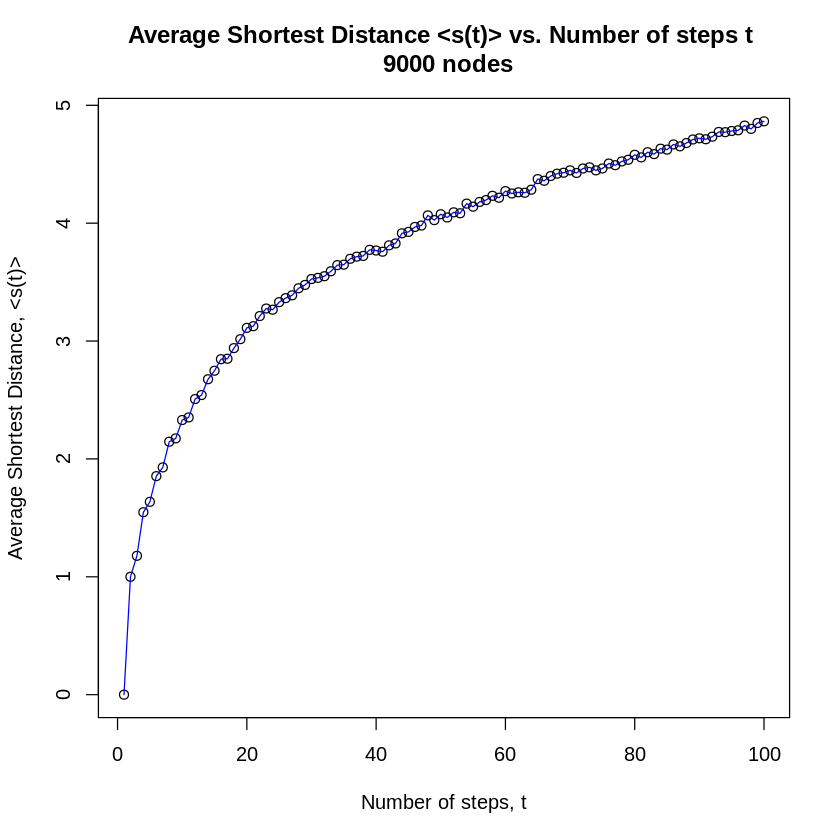

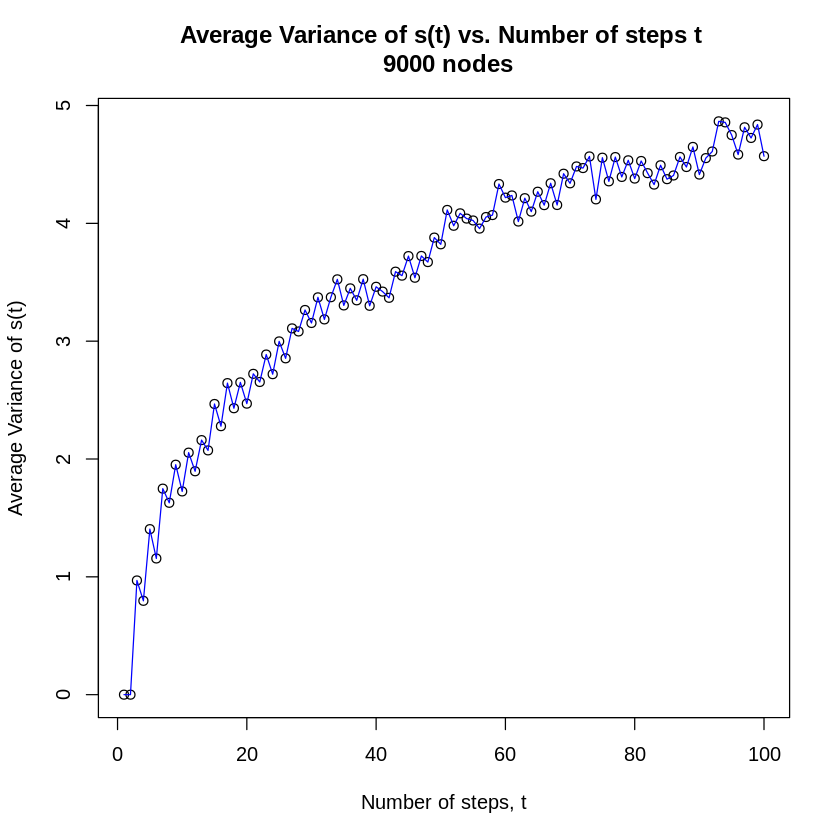

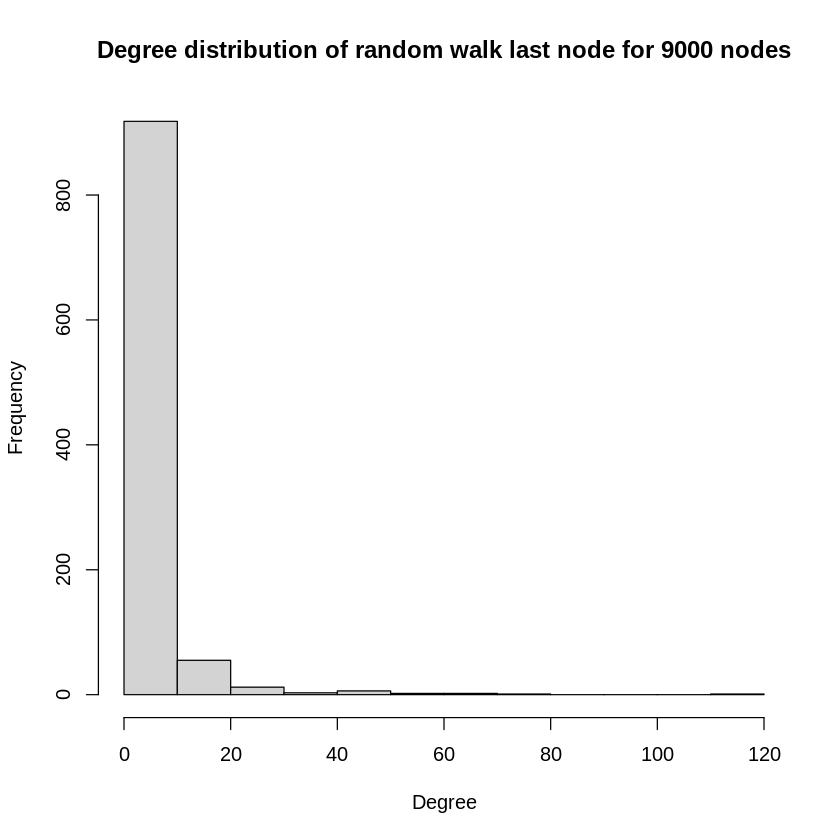

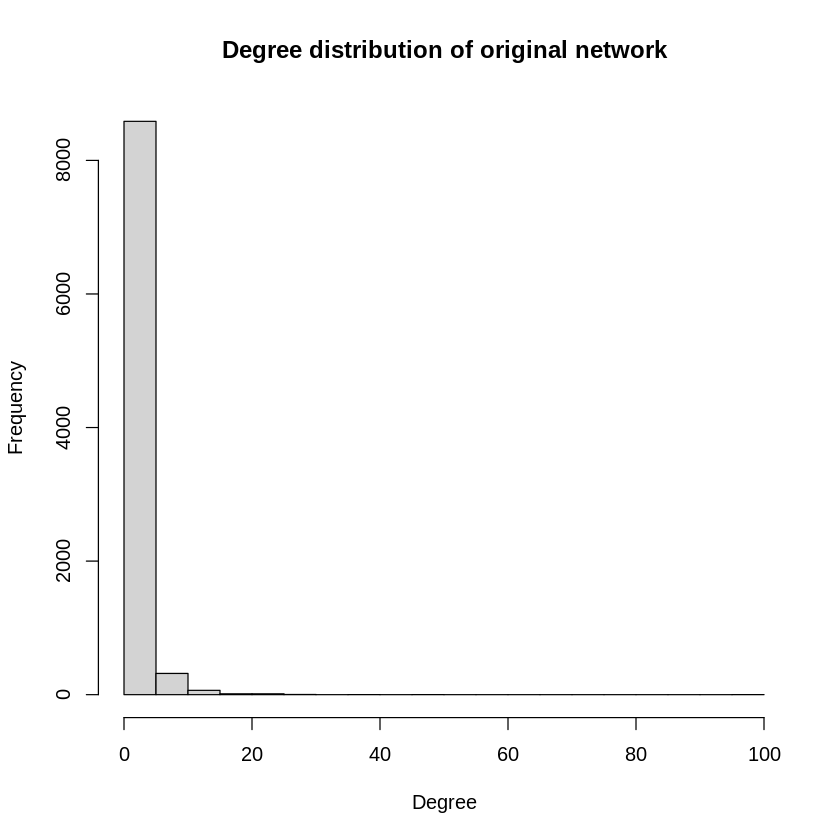

In [ ]:
n <- 9000
m <- 1
n_iteration <- 1000
t <- 100
results <- matrix(data=0.0, nrow=n_iteration, ncol=t)
last_vertex_degrees <- matrix(data=0.0, nrow=n_iteration, ncol=1)

for (i in 1:n_iteration) {
  # get the random walk network
  g <- barabasi.game(n, m=m, directed=F)
  if (is.connected(g)) {
    gcc <- g
  } else {
    g_components <- clusters(g)
    ix <- which.max(g_components$csize)
    gcc <- induced.subgraph(g, which(g_components$membership == ix))
  }

  # randonly select one vertex
  start <- sample(V(gcc), 1)
  # start random walk
  walked_vertices <- random_walk(gcc, steps=t, start)
  # find shortest path
  results[i,] <- shortest.paths(gcc, walked_vertices, start)
  # get last vertex
  last_vertex <- walked_vertices[t]
  # get degree of last vertex
  last_vertex_degrees[i, 1] <- degree(gcc, last_vertex)
}

plot(seq(t), colMeans(results), 
     main=sprintf("Average Shortest Distance <s(t)> vs. Number of steps t \n %d nodes", n),
     xlab = "Number of steps, t", ylab = "Average Shortest Distance, <s(t)>")
lines(seq(t), colMeans(results), col="blue")

plot(seq(t), colVars(results), 
     main=sprintf("Average Variance of s(t) vs. Number of steps t \n %d nodes", n),
     xlab = "Number of steps, t", ylab = "Average Variance of s(t)")
lines(seq(t), colVars(results), col="blue")

hist(last_vertex_degrees, xlab='Degree', ylab='Frequency', 
     main="Degree distribution of random walk last node for 9000 nodes")
hist(degree(g), xlab='Degree', ylab='Frequency', 
     main="Degree distribution of original network")

In [ ]:
print(sprintf("Diameter of original network of %d nodes: %d", n, diameter(g)))

[1] "Diameter of original network of 9000 nodes: 29"


<div class="alert alert-block alert-success">
<b>Answer 2 (d):</b> By comparing the results shown above with 90 nodes and 9000 nodes, we notice that the average shortest distance and the average variance monotonically increases as the number of steps becomes larger. For larger network, it converges to higher value compared with the smaller network, This is understandable since according to the example of undirected preferential attachment network plotted in 2(a), one can notice that such network has the characteristic of forming a strong intra-community, but sparse inter-community network connectivity. Therefore, the more random steps we test as well as the larger the network is, the higher the probability of ending at a further node could be, which leads to a larger shortest distance. This could be also proven through the diameter of the networks as the network with 9000 nodes has a diameter of 29 and network with 90 nodes only 11.

</div>

## 3. PageRank

<div class="alert alert-block alert-success">
<b>Question 3 (a):</b> We are going to create a directed random network with 900 nodes, using the preferential attachment model. Note that in a directed preferential attachment network, the out-degree of every node is m, while the in-degrees follow a power law distribution. One problem of performing random walk in such a network is that, the very first node will have no outbounding edges, and be a “black hole” which a random walker can never “escape” from. To address that, let’s generate another 900-node random network with preferential attachment model, and merge the two networks by adding the edges of the second graph to the first graph with a shuffling of the indices of the nodes. Create such a network using m = 4. Measure the probability that the walker visits each node. Is this probability related to the degree of the nodes?
</div>

In [ ]:
# given functions


create_transition_matrix = function (g){
    
  # WARNING: make sure your graph is connected (you might input GCC of your graph)
  
  vs = V(g)
  n = vcount(g)
  adj = as_adjacency_matrix(g)
  adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
  z = matrix(rowSums(adj, , 1))
  
  transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
  
  return(transition_matrix)
}


random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
  if(is.null(transition_matrix))
      transition_matrix = create_transition_matrix(g)

  # init
  walked_nodes = array(data=0.0, length(num_steps))
  
  v = start_node
  for(i in 1:num_steps){
      # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
      PMF = transition_matrix[v, ]
      v = sample(1:vcount(g), 1, prob = PMF)
      walked_nodes[i] = v     
  }
  
  return(walked_nodes)
}

In [ ]:
# constants
n <- 900
m <- 4
num_iteration <- 1000
num_steps <- 1000

# init
visited_nodes <- array(data=0.0, n)

# merge two networks
g1 <- barabasi.game(n, m=m, directed=T)
g2 <- barabasi.game(n, m=m, directed=T)
g2_shuffle <- permute(g2, sample(n))
g_merged <- add_edges(g1, c(t(as_edgelist(g2_shuffle))))

# start sampling
for (i in 1:num_iteration) {
  if (is.connected(g_merged)) {
    # randomly select start node and start random walk
    start_node <- sample(n, 1)
    walked_nodes <- random_walk(g_merged, num_steps, start_node)

  } else {
    # not connected, so get GCC first
    g_components <- clusters(g_merged)
    ix <- which.max(g_components$csize)
    orig_node_ids <- which(g_components$membership == ix)
    gcc <- induced.subgraph(g_merged, orig_node_ids)

    # randomly select start node and start random walk on GCC
    start_node <- sample(vcount(gcc), 1)
    walked_nodes <- random_walk(gcc, num_steps, start_node)

    # convert from gcc node ids back to original g_merged ids
    walked_nodes <- orig_node_ids[walked_nodes]
  }

  for (j in walked_nodes) {
    visited_nodes[j] = visited_nodes[j] + 1
  }
}

# calculate the node probability
node_prob = visited_nodes / (num_steps * num_iteration)

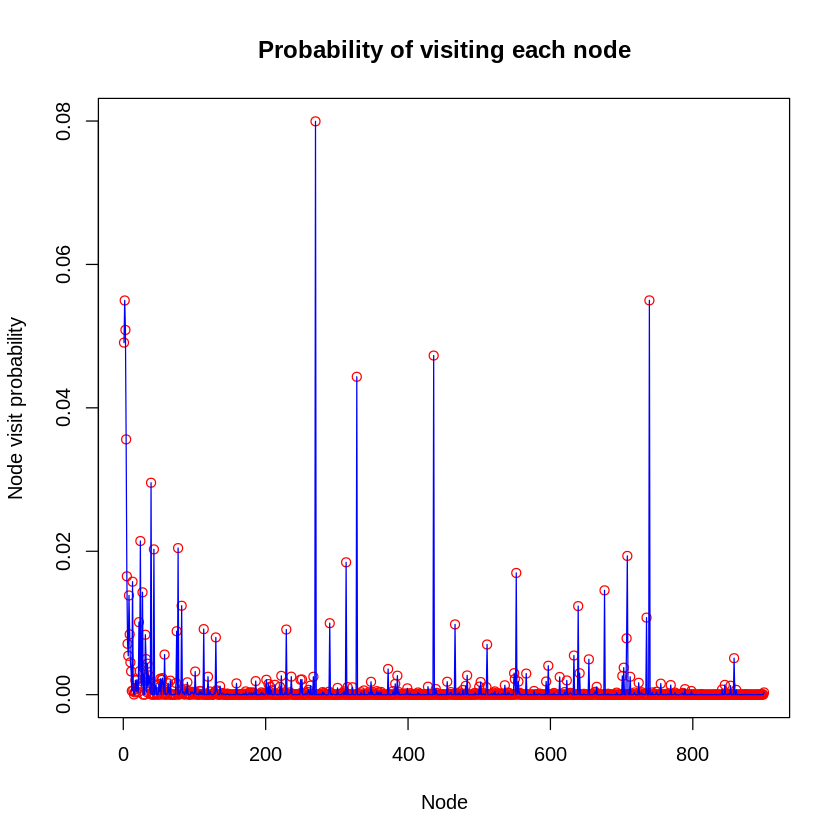

In [ ]:
# plot the probability distribution
plot(seq(1, n), node_prob,
     xlab='Node', ylab='Node visit probability', col='red',
     main='Probability of visiting each node')
lines(node_prob, col="blue")

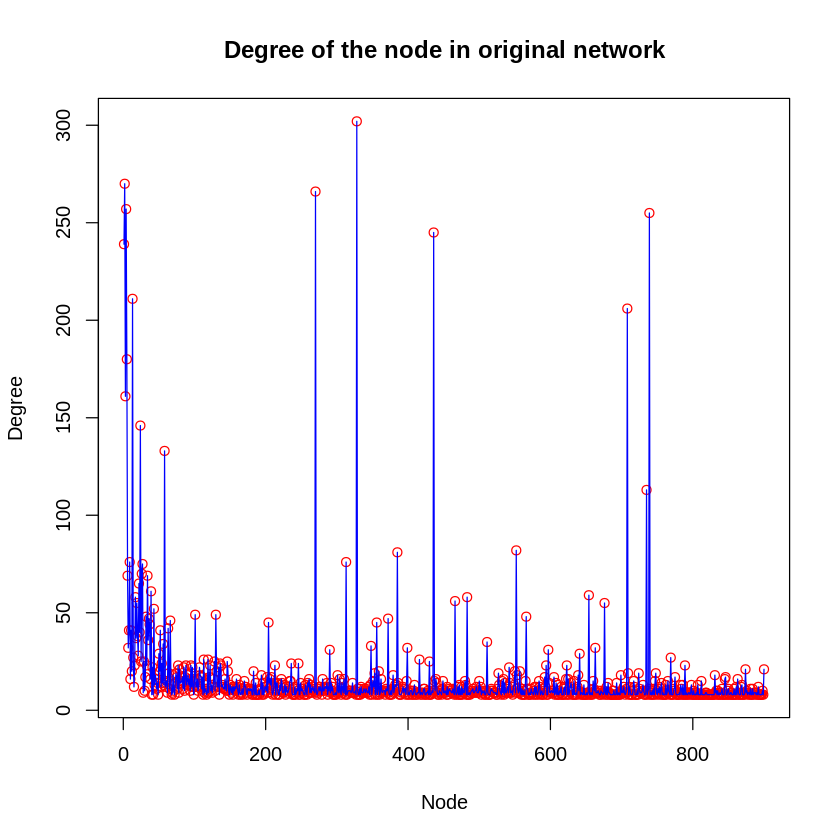

In [ ]:
# plot the degree of the node
plot(seq(length(degree(g_merged))), degree(g_merged), 
     xlab="Node", ylab="Degree", col='red',
     main=sprintf("Degree of the node in original network"))
lines(seq(length(degree(g_merged))), degree(g_merged), col='blue')

<div class="alert alert-block alert-success">
<b>Answer 3 (a):</b> The measured probability that the walker visits each node and the degree of each node in original network is plotted above. One can notice that there is a certain similarity between both the plots. Therefore, it can be concluded that the generated probability based on page rank is related to the degree of the nodes.
</div>

<div class="alert alert-block alert-success">
<b>Question 3 (b):</b> In all previous questions, we didn’t have any teleportation. Now, we use a teleportation probability of $\alpha = 0.2$ (teleport out of a node with prob=0.2 instead of going to its neighbor). By performing random walks on the network created in 3(a), measure the probability that the walker visits each node. How is this probability related to the degree of the node and $\alpha$?
</div>

In [ ]:
# add alpha to random walk functions

random_walk = function (g, num_steps, start_node, alpha, transition_matrix=NULL){
  if(is.null(transition_matrix))
      transition_matrix = create_transition_matrix(g)

  # init
  walked_nodes = array(data=0.0, length(num_steps))
  
  v = start_node
  for(i in 1:num_steps){
    if (runif(1) > alpha) {
      # no teleportation
      PMF = transition_matrix[v, ]
      v = sample(1:vcount(g), 1, prob = PMF)

    } else {
      # with teleportation (equal distribution)
      tele_prob = array(1/vcount(g), vcount(g))
      v = sample(1:vcount(g), 1, prob=tele_prob) 
    }
    walked_nodes[i] = v  
  }
  return(walked_nodes)
}

In [ ]:
# constants
n <- 900
m <- 4
num_iteration <- 1000
num_steps <- 1000
alpha <- 0.2

# init
visited_nodes <- array(data=0.0, n)

# merge two networks
g1 <- barabasi.game(n, m=m, directed=T)
g2 <- barabasi.game(n, m=m, directed=T)
g2_shuffle <- permute(g2, sample(n))
g_merged <- add_edges(g1, c(t(as_edgelist(g2_shuffle))))

# start sampling
for (i in 1:num_iteration) {
  if (is.connected(g_merged)) {
    # randomly select start node and start random walk
    start_node <- sample(n, 1)
    walked_nodes <- random_walk(g_merged, num_steps, start_node, alpha)

  } else {
    # not connected, so get GCC first
    g_components <- clusters(g_merged)
    ix <- which.max(g_components$csize)
    orig_node_ids <- which(g_components$membership == ix)
    gcc <- induced.subgraph(g_merged, orig_node_ids)

    # randomly select start node and start random walk on GCC
    start_node <- sample(vcount(gcc), 1)
    walked_nodes <- random_walk(gcc, num_steps, start_node, alpha)

    # convert from gcc node ids back to original g_merged ids
    walked_nodes <- orig_node_ids[walked_nodes]
  }

  for (j in walked_nodes) {
    visited_nodes[j] = visited_nodes[j] + 1
  }
}

# calculate the node probability
node_prob = visited_nodes / (num_steps * num_iteration)

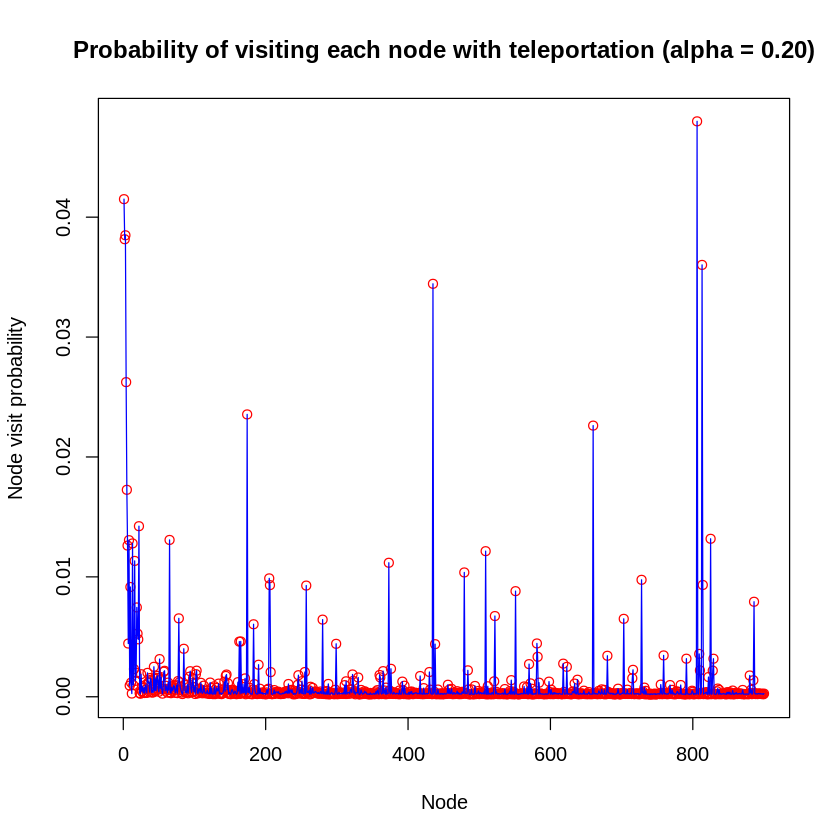

In [ ]:
# plot the probability distribution
plot(seq(1, n), node_prob,
     xlab='Node', ylab='Node visit probability', col='red',
     main=sprintf('Probability of visiting each node with teleportation (alpha = %.2f)', 
                  alpha))
lines(node_prob, col="blue")

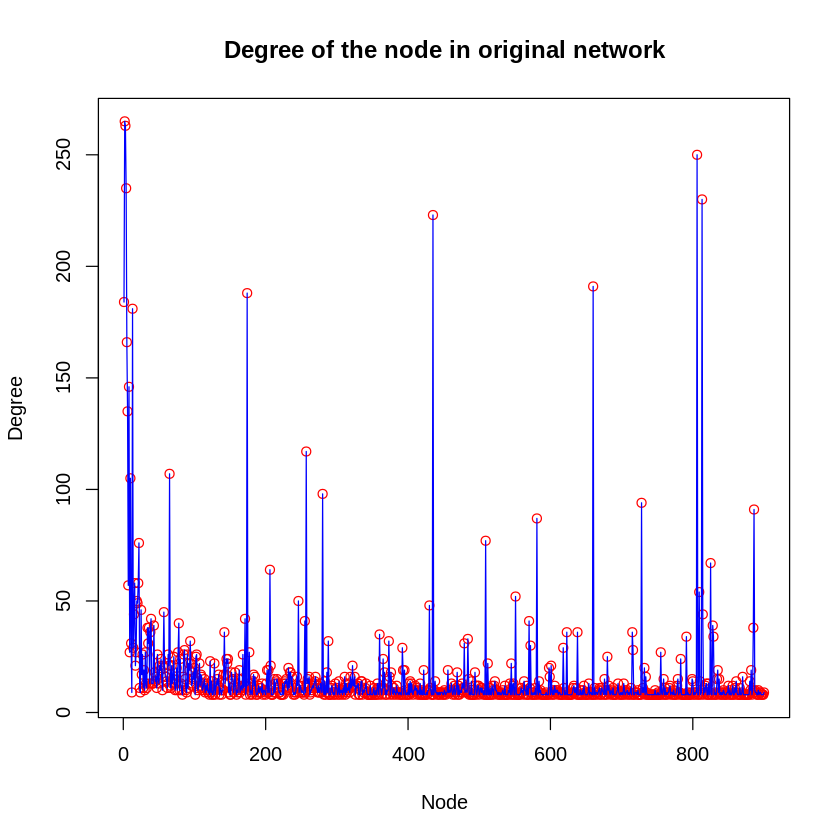

In [ ]:
# plot the degree of the node
plot(seq(length(degree(g_merged))), degree(g_merged), 
     xlab="Node", ylab="Degree", col='red',
     main=sprintf("Degree of the node in original network"))
lines(seq(length(degree(g_merged))), degree(g_merged), col='blue')

<div class="alert alert-block alert-success">
<b>Answer 3 (b):</b> The results are plotted above. Similar to 3(a), one can notice a highly related relationship between the probability that the walker visits each node and the degree of the node at the first glance. However, after careful observation, one can see that some nodes with low degree value have also achieved relatively high visit (probability). This means that with teleportation $\alpha$, the probability of visiting only highly connected nodes is reduced, and the lower degree nodes are also being visited by the random walker more often.
</div>

## 4. Personalized PageRank

<div class="alert alert-block alert-success">
<b>Question 4 (a):</b> Suppose you have your own notion of importance. Your interest in a node is proportional to the node’s PageRank, because you totally rely upon Google to decide which website to visit (assume that these nodes represent websites). Again, use random walk on network generated in question 3 to simulate this personalized PageRank. Here the teleportation probability to each node is proportional to its PageRank (as opposed to the regular PageRank, where at teleportation, the chance of visiting all nodes are the same and equal to $\frac{1}{N}$). Again, let the teleportation probability be equal to $\alpha = 0.2$. Compare the results with 3(a).
</div>

In [ ]:
# add alpha to random walk functions

random_walk = function (g, num_steps, start_node, alpha, transition_matrix=NULL){
  if(is.null(transition_matrix))
      transition_matrix = create_transition_matrix(g)

  # init
  walked_nodes = array(data=0.0, length(num_steps))
  
  v = start_node
  for(i in 1:num_steps){
    if (runif(1) > alpha) {
      # no teleportation
      PMF = transition_matrix[v, ]
      v = sample(1:vcount(g), 1, prob = PMF)

    } else {
      # with teleportation (proportional to its PageRank)
      pr = page_rank(g, directed=T)$vector
      tele_prob = pr/sum(pr)
      v = sample(1:vcount(g), 1, prob=tele_prob) 
    }
    walked_nodes[i] = v  
  }
  return(walked_nodes)
}

In [ ]:
# constants
n <- 900
m <- 4
num_iteration <- 1000
num_steps <- 1000
alpha <- 0.2

# init
visited_nodes <- array(data=0.0, n)

# merge two networks
g1 <- barabasi.game(n, m=m, directed=T)
g2 <- barabasi.game(n, m=m, directed=T)
g2_shuffle <- permute(g2, sample(n))
g_merged <- add_edges(g1, c(t(as_edgelist(g2_shuffle))))

# start sampling
for (i in 1:num_iteration) {
  if (is.connected(g_merged)) {
    # randomly select start node and start random walk
    start_node <- sample(n, 1)
    walked_nodes <- random_walk(g_merged, num_steps, start_node, alpha)

  } else {
    # not connected, so get GCC first
    g_components <- clusters(g_merged)
    ix <- which.max(g_components$csize)
    orig_node_ids <- which(g_components$membership == ix)
    gcc <- induced.subgraph(g_merged, orig_node_ids)

    # randomly select start node and start random walk on GCC
    start_node <- sample(vcount(gcc), 1)
    walked_nodes <- random_walk(gcc, num_steps, start_node, alpha)

    # convert from gcc node ids back to original g_merged ids
    walked_nodes <- orig_node_ids[walked_nodes]
  }

  for (j in walked_nodes) {
    visited_nodes[j] = visited_nodes[j] + 1
  }
}

# calculate the node probability
node_prob = visited_nodes / (num_steps * num_iteration)

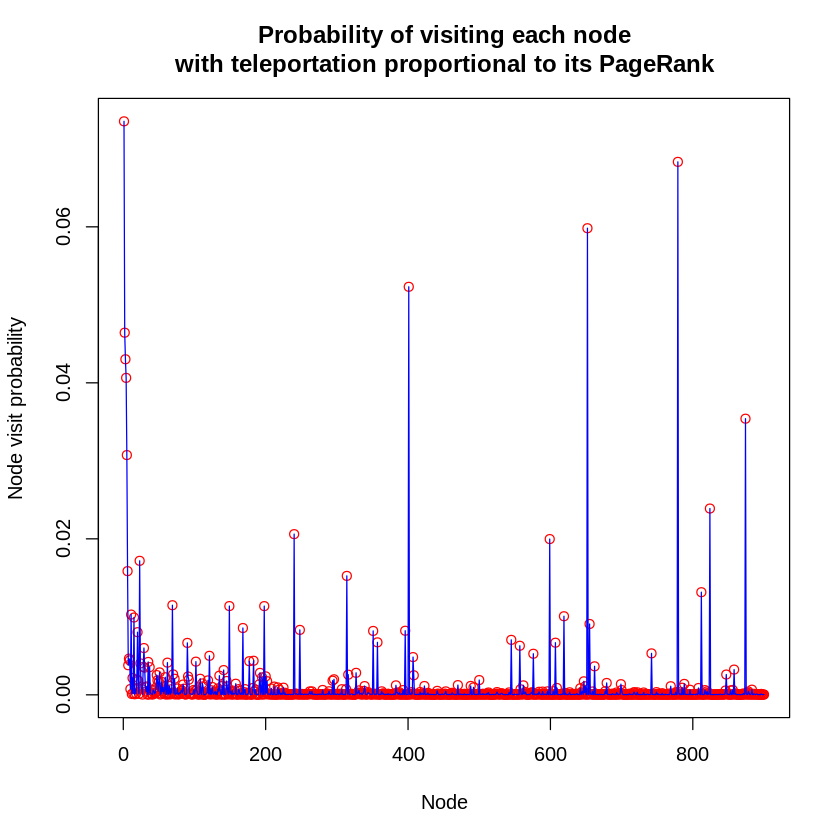

In [ ]:
# plot the probability distribution
plot(seq(1, n), node_prob,
     xlab='Node', ylab='Node visit probability', col='red',
     main="Probability of visiting each node\nwith teleportation proportional to its PageRank")
lines(node_prob, col="blue")

<div class="alert alert-block alert-success">
<b>Answer 4 (a):</b> The result of the probability of visiting each node with teleportation proportional to its PageRank is shown above. Compared to the plot in 3(a), one can notice a similar trend that just a few of nodes are highly visited by random walker and most of the nodes are not. This is expected as we are simulating preferential attachment model at here, which has this characteristics. However, with teleportation proportional to its value of PageRank algorithm activated, one can observe the following small changes affected by the teleportation: overall smaller peak probability (0.08 in 3(a) and under 0.07 in 4(a)), more nodes in 4(a) achieved higher probability (especially in first 200 nodes).
</div>

<div class="alert alert-block alert-success">
<b>Question 4 (b):</b> Find two nodes in the network with median PageRanks. Repeat part 4(a) if teleportations land only on those two nodes (with probabilities $1/2$, $1/2$). How are the PageRank values affected?
</div>

In [ ]:
# add alpha to random walk functions

random_walk = function (g, num_steps, start_node, alpha, transition_matrix=NULL){
  if(is.null(transition_matrix))
      transition_matrix = create_transition_matrix(g)

  # init
  walked_nodes = array(data=0.0, length(num_steps))
  
  v = start_node
  for(i in 1:num_steps){
    if (runif(1) > alpha) {
      # no teleportation
      PMF = transition_matrix[v, ]
      v = sample(1:vcount(g), 1, prob = PMF)

    } else {
      # with teleportation (with median PageRanks)
      pr = page_rank(g, directed=T)$vector
      df = data.frame("idx"=1:vcount(g), "value"=pr)
      df=df[order(df$value),]
      tele_prob=array(0, vcount(g))
      tele_prob[df$idx[(vcount(g) %/% 2):(vcount(g) %/% 2)+1]]=0.5
      v = sample(1:vcount(g), 1, prob=tele_prob) 
    }
    walked_nodes[i] = v  
  }
  return(walked_nodes)
}

In [ ]:
# constants
n <- 900
m <- 4
num_iteration <- 1000
num_steps <- 1000
alpha <- 0.2

# init
visited_nodes <- array(data=0.0, n)

# merge two networks
g1 <- barabasi.game(n, m=m, directed=T)
g2 <- barabasi.game(n, m=m, directed=T)
g2_shuffle <- permute(g2, sample(n))
g_merged <- add_edges(g1, c(t(as_edgelist(g2_shuffle))))

# start sampling
for (i in 1:num_iteration) {
  if (is.connected(g_merged)) {
    # randomly select start node and start random walk
    start_node <- sample(n, 1)
    walked_nodes <- random_walk(g_merged, num_steps, start_node, alpha)

  } else {
    # not connected, so get GCC first
    g_components <- clusters(g_merged)
    ix <- which.max(g_components$csize)
    orig_node_ids <- which(g_components$membership == ix)
    gcc <- induced.subgraph(g_merged, orig_node_ids)

    # randomly select start node and start random walk on GCC
    start_node <- sample(vcount(gcc), 1)
    walked_nodes <- random_walk(gcc, num_steps, start_node, alpha)

    # convert from gcc node ids back to original g_merged ids
    walked_nodes <- orig_node_ids[walked_nodes]
  }

  for (j in walked_nodes) {
    visited_nodes[j] = visited_nodes[j] + 1
  }
}

# calculate the node probability
node_prob = visited_nodes / (num_steps * num_iteration)

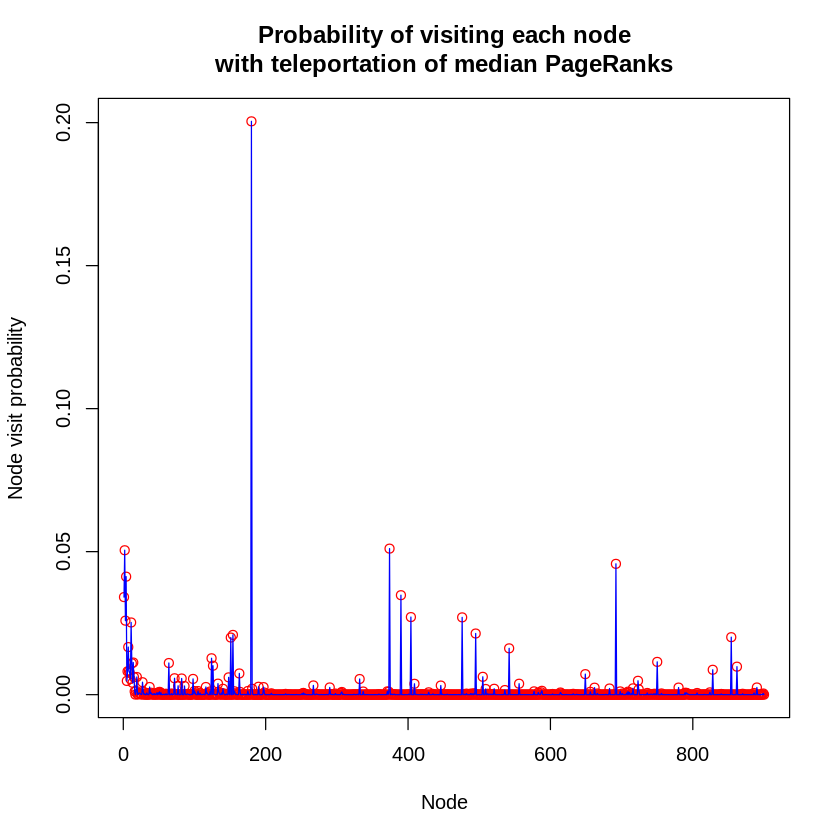

In [ ]:
# plot the probability distribution
plot(seq(1, n), node_prob,
     xlab='Node', ylab='Node visit probability', col='red',
     main="Probability of visiting each node\nwith teleportation of median PageRanks")
lines(node_prob, col="blue")

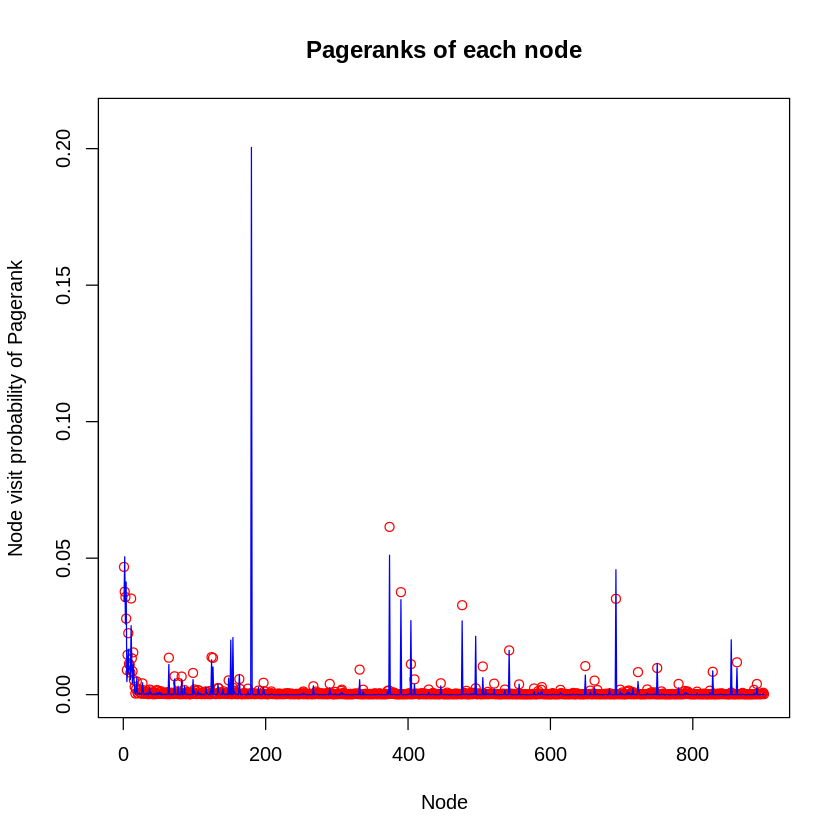

In [ ]:
pageranks = page_rank(g_merged)$vector
plot(seq(1, n), pageranks, ylim=c(0, 0.21),
     xlab='Node', ylab='Node visit probability of Pagerank', col='red',
     main="Pageranks of each node")
lines(node_prob, col="blue")

<div class="alert alert-block alert-success">
<b>Answer 4 (b):</b> From the plots shown above, one can see that there is a single node with high peak probability among all other nodes. The probability of visiting this node is exactly 0.2, which is equal to the teleportation probability. By comparing with the Pagerank scores of the original network, we can observe that with median Pagerank, one can hugely increase the Pagerank score at the certain teleportation node to reach the teleportation probability since this peak doesn't exist in the original network. However, it will also decrease the Pagerank scores of the rest of the nodes slightly as an adjustment. 
</div>

<div class="alert alert-block alert-success">
<b>Question 4 (c):</b> More or less, 4(b) is what happens in the real world, in that a user browsing the web only teleports to a set of trusted web pages. However, this is against the assumption of normal PageRank, where we assume that people’s interest in all nodes are the same. Can you take into account the effect of this self-reinforcement and adjust the PageRank equation?
</div>



<div class="alert alert-block alert-success">
<b>Answer 4 (c):</b> To take self-reinforcement into account, we can combine the equations from the original Pagerank equation and the personalized Pagerank equation with teleportation to form the following equation:

$$
\pi(i) = (1-\alpha)\Sigma_{j=1}^{|V|}\frac{1}{k_{out}(j)}A_{ji}\pi(j)+\frac{\alpha}{|T|}\text{, for }i \in T
$$

$$
\pi(i) = (1-\alpha)\Sigma_{j=1}^{|V|}\frac{1}{k_{out}(j)}A_{ji}\pi(j)\text{, for }i \notin T
$$

</div>